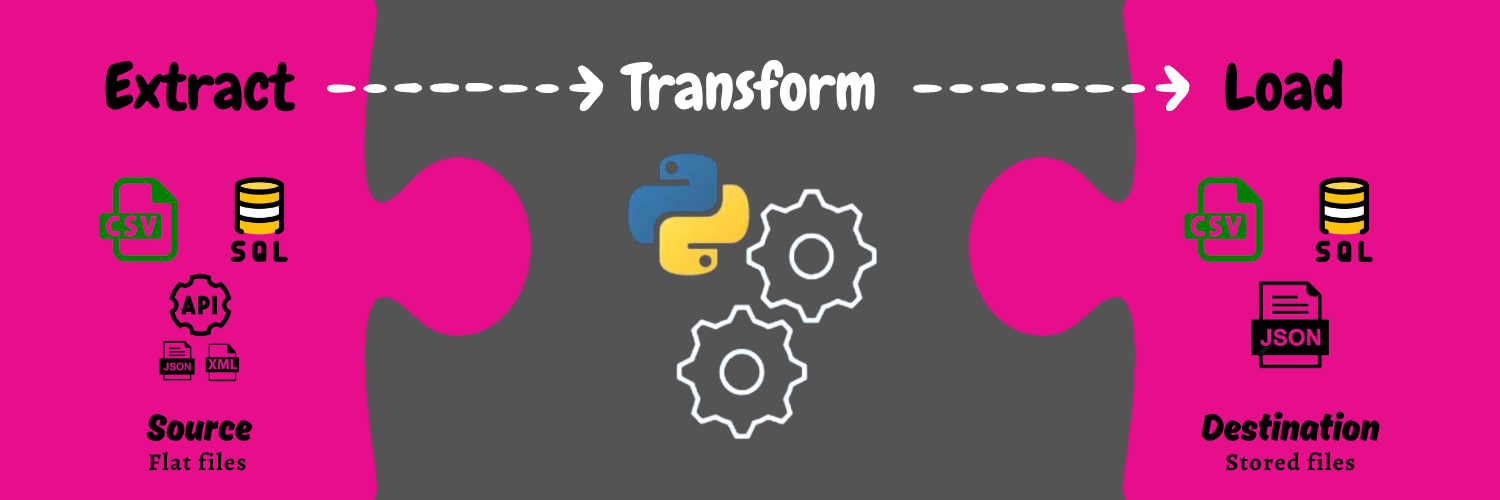

# Table of Content
[1. **INTRODUCTION -** Overview](#Project-overview)
<br>&emsp;[1.1 About the data](#1.1-Dataset-details)

[2. **EXTRACT -** Overview](#2.-Stage-1---EXTRACT)
<br>&emsp;[2.1 Data extraction from a CSV](#2.1-Importing-data-from-CSV-files)
<br>&emsp;[2.2 Data extraction from an API](#2.2-Importing-data-from-APIs)
<br>&emsp;&emsp;[2.2.1 From a JSON files](#2.2.1-Importing-data-from-JSON-files-directly)
<br>&emsp;&emsp;[2.2.2 From a XML files](#2.2.2-Importing-data-from-XML-files-directly)
<br>&emsp;[2.3 Data extraction from databases](#2.3-Importing-data-from-databases)
<br>&emsp;&emsp;[2.3.1 From SQLite DBs](#2.3.1-Importing-data-from-a-SQLite-database)
<br>&emsp;&emsp;[2.3.2 From PostgreSQL DBs](#2.3.2-Importing-data-from-a-PostgreSQL-database )

[3. **TRANSFORM -** Overview](#3.-Stage-2---TRANSFORM)
<br>&emsp;[3.1 Combining datasets](#3.1-Combining-two-datasets)
<br>&emsp;[3.2 Cleaning data](#3.2-Cleaning-data)
<br>&emsp;[3.3 Data types](#3.3-Data-types)
<br>&emsp;&emsp;[3.3.1 Parsing dates](#3.3.1-Parsing-dates)
<br>&emsp;[3.4 Missing values](#3.4-Handling-missing-values)
<br>&emsp;[3.5 Duplicate values](#3.5-Duplicate-values)
<br>&emsp;[3.6 Duplicate values](#3.6-Dummy-variables)
<br>&emsp;[3.7 Finding outliers](#3.7-Finding-Outliers)
<br>&emsp;[3.8 Removing outliers](#3.8-Eliminating-Outliers)
<br>&emsp;[3.9 Feature scaling](#3.9-Feature-scaling)
<br>&emsp;&emsp;[3.9.1 Normalization](#3.9.1-Normalization-of-Data)
<br>&emsp;&emsp;[3.9.2 Standardization](#3.9.2-Standardization-of-Data)
<br>&emsp;[3.10 Feature engineering](#3.10-Feature-engineering)

[4. **LOAD -** Overview](#4.-Stage-3---LOAD)
<br>&emsp;[4.1 To CSV file](#4.1-Loading-the-data-in-a-CSV-file)
<br>&emsp;[4.2 To a JSON file](#4.2-Loading-the-data-in-a-JSON-file)
<br>&emsp;[4.3 To a SQLite DB](#4.3-Loading-the-data-in-a-SQLite-DB)
<br>&emsp;[4.4 To a PostgreSQL DB](#4.4-Loading-the-data-in-a-PostgreSQL-DB)

# **1. Introduction**
### Project overview
This project mainly focuses on understanding all the steps present in the 3 stages of an ETL process (Extract, Transform & Load) process.
We will look at every stage individally and try to get a sense of what actually happens in them.
<br><br>
**NOTE** - We are not gonna focus on building the data pipeline, instead we are gonna understand every stage of an ETL process (for different types of files) - which will not only help you in understanding ETL clearly but will also help you in building any kind of data pipeline you want. 

### 1.1 Dataset details
Below is the list of files which we will use in this project. This data comes from the World Bank. Here are the sources -

A) [**World bank indicators**](https://data.worldbank.org/indicator) - This data contains socio-economic indicators for countries around the world. A few example indicators include population, arable land, central government debt etc.
- [electricity_percent.csv](https://data.worldbank.org/indicator/EG.ELC.ACCS.ZS?view=chart)
- [gdp_data.csv](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?view=chart)
- [population_data.csv](https://data.worldbank.org/indicator/SP.POP.TOTL?view=chart)
- [population_data.db](https://data.worldbank.org/indicator/SP.POP.TOTL?view=chart)
- [population_data.json](https://data.worldbank.org/indicator/SP.POP.TOTL?view=chart)
- [population_data.xml](https://data.worldbank.org/indicator/SP.POP.TOTL?view=chart)
- [rural_population.csv](https://data.worldbank.org/indicator/SP.RUR.TOTL?view=chart)

B) [**Word bank projects**](https://datacatalog.worldbank.org/dataset/world-bank-projects-operations) - This data set contains information about World Bank project lending since 1947.
 - [projects_data.csv](https://search.worldbank.org/api/projects/all.xls)

### Let's start then!
# **2. Stage 1 - EXTRACT**

**Meaning** - In simpler words, it is nothing but bringing all the data from different sources into the python dataframe. Below image shows an illustartion of the same - 
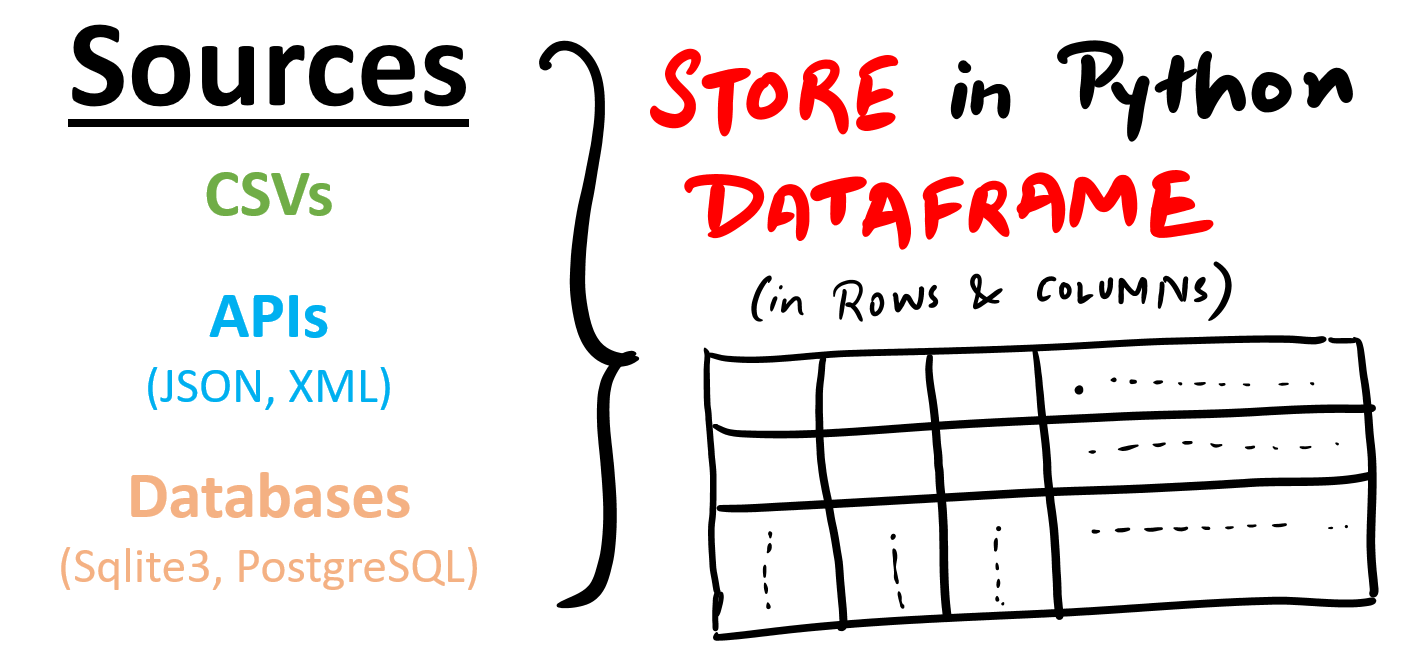

Once we have understood the meaning of the "Extract" stage. We will now begin implementing it with different types of files.

__NOTE__ - We first start with CSVs, then move onto APIs (dealing with JSON and XML files), and then finally move to databases (Sqlite3 & PostgreSQL).

### 2.1 Importing data from CSV files

In [1]:
#Lets first import the library which we will use to extract data from CSV files and store into a dataframe.

import pandas as pd
import numpy as np

We'll read the first dataset named **"projects_data.csv"** in the pandas dataframe using the function "**read_csv** (file_path, data_type of the columns)".
<br><br>We are also using the __dtype__ = 'str' argument in the function in order to explicitly tell pandas that all the columns should be imported as strings only.

In [2]:
df_projects = pd.read_csv('C:/Users/Admin/Downloads/ETL Project/kaggle/input/projects_data.csv', dtype = 'str')

#NOTE - 'C:/Users/Admin/Downloads/ETL Project/kaggle/input/projects_data.csv' is where the file named "projects_data.csv" is stored on your system.

__NOTE__ - Do try the code without "dtype" argument and see the result. Does it give you a different output? __OR__ any warning?

In [3]:
# Checking whether the dataset is imported or not

df_projects.head()

id  regionname                                        countryname  \
0  P162228       Other                                        World;World   
1  P163962      Africa  Democratic Republic of the Congo;Democratic Re...   
2  P167672  South Asia  People's Republic of Bangladesh;People's Repub...   
3  P158768  South Asia  Islamic  Republic of Afghanistan;Islamic  Repu...   
4  P161364      Africa  Federal Republic of Nigeria;Federal Republic o...   

  prodline                  lendinginstr lendinginstrtype  \
0       RE  Investment Project Financing               IN   
1       PE  Investment Project Financing               IN   
2       PE  Investment Project Financing               IN   
3       PE  Investment Project Financing               IN   
4       PE  Investment Project Financing               IN   

  envassesmentcategorycode supplementprojectflg productlinetype  \
0                        C                    N               L   
1                        B                    N               L   
2                      NaN                    Y               L   
3                        A                    N               L   
4                        B                    N               L   

  projectstatusdisplay  ... mjtheme3name mjtheme4name mjtheme5name  \
0               Active  ...          NaN          NaN          NaN   
1               Active  ...          NaN          NaN          NaN   
2               Active  ...          NaN          NaN          NaN   
3               Active  ...          NaN          NaN          NaN   
4               Active  ...          NaN          NaN          NaN   

                                            location  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...   

                                            GeoLocID  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  0002327546;0002328925;0002565340;0002565343;00...   

                                          GeoLocName                 Latitude  \
0                                                NaN                      NaN   
1                                                NaN                      NaN   
2                                                NaN                      NaN   
3                                                NaN                      NaN   
4  Ogun State;Niger State;Abia State;Edo;Kebbi St...  7;10;5.41667;6.5;11.5;8   

                Longitude            Country Unnamed: 56  
0                     NaN                NaN         NaN  
1                     NaN                NaN         NaN  
2                     NaN                NaN         NaN  
3                     NaN                NaN         NaN  
4  3.58333;6;7.5;6;4;10.5  NG;NG;NG;NG;NG;NG         NaN  

[5 rows x 57 columns]

In [4]:
# Once the data is imported, we can now check out the data.

df_projects.isnull().sum() #checking missing values in each column

id                              0
regionname                      0
countryname                     0
prodline                        0
lendinginstr                  246
lendinginstrtype              246
envassesmentcategorycode     5811
supplementprojectflg           53
productlinetype                 0
projectstatusdisplay            4
status                          4
project_name                    0
boardapprovaldate            1504
board_approval_month         1504
closingdate                  3349
lendprojectcost               125
ibrdcommamt                     0
idacommamt                      0
totalamt                        0
grantamt                        0
borrower                     5919
impagency                    6097
url                             0
projectdoc                  18248
majorsector_percent         18248
sector1                         0
sector2                      8721
sector3                     11761
sector4                     13872
sector5       

In [5]:
# Checking the total no. of rows & columns in the data

df_projects.shape

(18248, 57)

#### And, that's it! That's how you import data from a CSV file into the pandas dataframe. It was easy, wasn't it?
But there could be small challenges coming in while doing so - let's look at one of those scenarios!
<br> Next, use the pandas __read_csv ()__ method to read in the "__population_data.csv__" file. 

In [6]:
#Reading population_data.csv file in the pandas dataframe

df_population = pd.read_csv('C:/Users/Admin/Downloads/ETL Project/kaggle/input/population_data.csv')

What might have happened? It seems that there was some error while reading the data from the rows of the CSV file.
<br><br> Let's open the file and see what could be wrong with it. For this we have two options - 
- Opening the file manually in Excel (you can try this yourself)
- Opening the file in python itself (let's do this together)

<br> Let's try opening the file and print out the starting lines to see what the issue might be. 
We can do this in two ways - default way and using the "with" keyword

In [7]:
# Using the default way

f = open('C:/Users/Admin/Downloads/ETL Project/kaggle/input/population_data.csv') #opening the file connection by creating a file object named "f"
for i in range(10): # Loop iterates over the len. of "df_projects"
    line = f.readline() #data is read line by line using the readline() method
    print('Line =',i, line)
f.close() #closing the file connection manually

Line = 0 ï»¿"Data Source","World Development Indicators",

Line = 1 

Line = 2 "Last Updated Date","2018-06-28",

Line = 3 

Line = 4 "Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017",

Line = 5 "Aruba","ABW","Population, total","SP.POP.TOTL","54211","55438","56225","56695","57032","57360","57715","58055","58386","58726","59063","59440","59840","60243","60528","60657","60586","60366","60103","59980","60096","60567","61345","62201","62836","63026","62644","61833","61079","61032","62149","64622","68235","72504","76700","80324","83200","85451","87277","89005","90853","92898","

In [8]:
# Using the "with" keyword

with open('C:/Users/Admin/Downloads/ETL Project/kaggle/input/population_data.csv') as f: #opening the file conn. by creating a file object named "f"
    for i, line in enumerate(f): #enumerate() function to get both the line number (i) & the line content (line) simultaneously.
        print("Line", i, "=", line) #printing the line number and line

# NOTE - Here we do not close the file manually (the with keyword  automatically handles the closing of the file once it's out of scope).

Line 0 = ï»¿"Data Source","World Development Indicators",

Line 1 = 

Line 2 = "Last Updated Date","2018-06-28",

Line 3 = 

Line 4 = "Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017",

Line 5 = "Aruba","ABW","Population, total","SP.POP.TOTL","54211","55438","56225","56695","57032","57360","57715","58055","58386","58726","59063","59440","59840","60243","60528","60657","60586","60366","60103","59980","60096","60567","61345","62201","62836","63026","62644","61833","61079","61032","62149","64622","68235","72504","76700","80324","83200","85451","87277","89005","90853","92898","

When we see the output, we notice that the first four lines in the file are not properly formatted and don't contain data. Hence, the pandas dataframe was throwing an error as it did not get any value in those 4 rows to read. 
<br><br>Let's read the data again but this time we'll "**skip**" the starting 4 rows.

In [9]:
# Reading the dataset with 4 skipped rows

df_population = pd.read_csv('C:/Users/Admin/Downloads/ETL Project/kaggle/input/population_data.csv', dtype = 'str', skiprows = 4)

In [10]:
# Checking if the dataset is imported or not

df_population.head()

Country Name Country Code     Indicator Name Indicator Code     1960  \
0        Aruba          ABW  Population, total    SP.POP.TOTL    54211   
1  Afghanistan          AFG  Population, total    SP.POP.TOTL  8996351   
2       Angola          AGO  Population, total    SP.POP.TOTL  5643182   
3      Albania          ALB  Population, total    SP.POP.TOTL  1608800   
4      Andorra          AND  Population, total    SP.POP.TOTL    13411   

      1961     1962     1963     1964     1965  ...      2009      2010  \
0    55438    56225    56695    57032    57360  ...    101453    101669   
1  9166764  9345868  9533954  9731361  9938414  ...  28004331  28803167   
2  5753024  5866061  5980417  6093321  6203299  ...  22549547  23369131   
3  1659800  1711319  1762621  1814135  1864791  ...   2927519   2913021   
4    14375    15370    16412    17469    18549  ...     84462     84449   

       2011      2012      2013      2014      2015      2016      2017  \
0    102053    102577    103187    103795    104341    104822    105264   
1  29708599  30696958  31731688  32758020  33736494  34656032  35530081   
2  24218565  25096150  25998340  26920466  27859305  28813463  29784193   
3   2905195   2900401   2895092   2889104   2880703   2876101   2873457   
4     83751     82431     80788     79223     78014     77281     76965   

  Unnamed: 62  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 63 columns]

In [11]:
#Check the no. of null values in every column

df_population.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                4
                 ... 
2014                2
2015                2
2016                2
2017                2
Unnamed: 62       264
Length: 63, dtype: int64

In [12]:
#Check the no. of null values in every row by using axis = 1

df_population.isnull().sum(axis = 1)

0      1
1      1
2      1
3      1
4      1
      ..
259    1
260    1
261    1
262    1
263    1
Length: 264, dtype: int64

##### After checking the null values in columns and rows we make two observations - 
- every year column has at least one NaN value.
- almost every row has only one null value.

That is probably from the '__Unnamed: 62__' column that doesn't have any relevant information in it. Let's drop this column from the data frame.

In [13]:
# Dropping the column named 'Unnamed: 62' from the dataframe

df_population = df_population.drop('Unnamed: 62', axis = 1) #here 'axis = 1' means the drop operation will be applied column-wise (vertically)

In [14]:
# This code outputs any row that contains a null value
# The purpose is to see what rows contain null values now that 
# 'Unnamed: 62' was dropped from the data.

df_population[df_population.isnull().any(axis = 1)]

Country Name Country Code     Indicator Name Indicator Code  \
67                     Eritrea          ERI  Population, total    SP.POP.TOTL   
108             Not classified          INX  Population, total    SP.POP.TOTL   
125                     Kuwait          KWT  Population, total    SP.POP.TOTL   
194         West Bank and Gaza          PSE  Population, total    SP.POP.TOTL   
212                     Serbia          SRB  Population, total    SP.POP.TOTL   
223  Sint Maarten (Dutch part)          SXM  Population, total    SP.POP.TOTL   

        1960     1961     1962     1963     1964     1965  ...     2008  \
67   1397491  1432640  1469645  1508273  1548187  1589179  ...  4232636   
108      NaN      NaN      NaN      NaN      NaN      NaN  ...      NaN   
125   269618   301336   338296   379891   425235   473554  ...  2652340   
194      NaN      NaN      NaN      NaN      NaN      NaN  ...  3596688   
212      NaN      NaN      NaN      NaN      NaN      NaN  ...  7350222   
223      NaN      NaN      NaN      NaN      NaN      NaN  ...    33964   

        2009     2010     2011     2012     2013     2014     2015     2016  \
67   4310334  4390840  4474690      NaN      NaN      NaN      NaN      NaN   
108      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
125  2818939  2998083  3191051  3395556  3598385  3782450  3935794  4052584   
194  3702218  3811102  3927051  4046901  4169506  4294682  4422143  4551566   
212  7320807  7291436  7234099  7199077  7164132  7130576  7095383  7058322   
223    34238    34056    33435    34640    36607    37685    38824    39969   

        2017  
67       NaN  
108      NaN  
125  4136528  
194  4684777  
212  7022268  
223    41109  

[6 rows x 62 columns]

That's about it for reading data from a CSV file. Mostly you'll need a pandas method named "__read_csv ()__" to store the data from a CSV into a dataframe.

<br>Rest all steps are just about the kind of data we have, it could be - 
- checking out the data for missing values - columns as well as rows
- removing any columns (if required)
- etc....

Now, let's move onto the next input source - __APIs (JSONs, XMLs)__

### 2.2 Importing data from APIs

When we import data from APIs, there are 3 steps required -
- create a URL for the information you need
- send a request on that URL
- receive the data

<br>A detailed explaination is given in the below image -

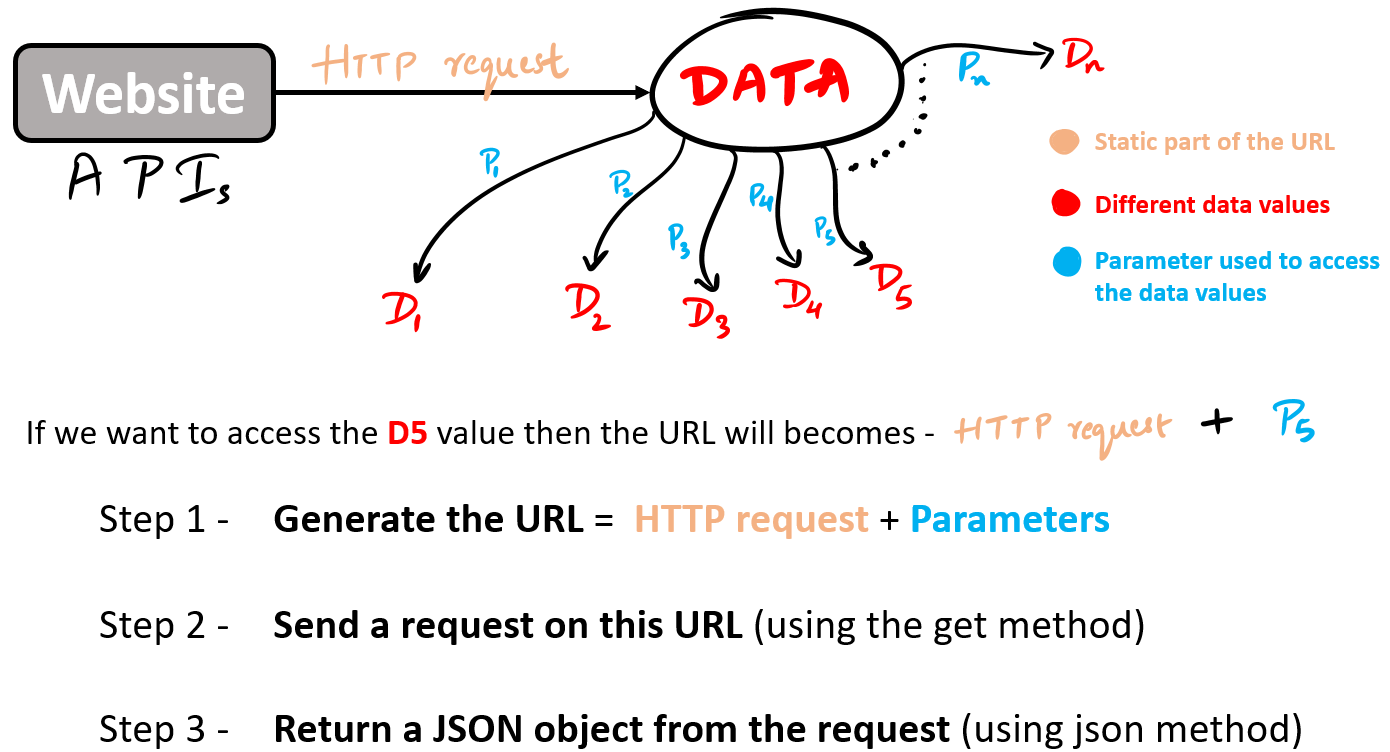

__NOTE__ :-
- The URL should be generated as per the **API documentation** page which is given on the website. 
- It tells which parameter we can use in order to access a particular data.
- Also, the parameters can be used in combination as well (incase of accessing more complex data).

### Now, let's start the process of extracting data from an API!

First, we'll create a URL for sending a request. According to the **[documentation](https://datahelpdesk.worldbank.org/knowledgebase/articles/898581-api-basic-call-structure)**, we format our request url like so:

http://api.worldbank.org/v2/countries/ + list of country abbreviations separated by ; + /indicators/ + indicator name + ? + options

where options can include
- per_page - number of records to return per page
- page - which page to return - eg if there are 5000 records and 100 records per page
- date - filter by dates
- format - json or xmltors

In [15]:
# Importing the library which will be used for fetching the data from an API

import requests

In [16]:
# Step 1 = create the URL
url = 'http://api.worldbank.org/v2/countries/br;cn;us;de/indicators/SP.POP.TOTL/?format=json&per_page=1000'

# Step 2 - send a request on the URL using the get() method 
r = requests.get(url) #get function sends a request to the server for getting the required data

# Step 3 - receive the data in a json format using the json() method
req = r.json() #json function basically retrieves the data and converts it in the JSON format (which has a structure of key-value pairs)
req

[{'page': 1,
  'pages': 1,
  'per_page': 1000,
  'total': 256,
  'sourceid': '2',
  'lastupdated': '2024-03-28'},
 [{'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'BR', 'value': 'Brazil'},
   'countryiso3code': 'BRA',
   'date': '2023',
   'value': None,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'BR', 'value': 'Brazil'},
   'countryiso3code': 'BRA',
   'date': '2022',
   'value': 215313498,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'BR', 'value': 'Brazil'},
   'countryiso3code': 'BRA',
   'date': '2021',
   'value': 214326223,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'BR', 'value': 'Brazil'},
   'countryiso3code': 'BRA',
   'date': '2020',
   '

##### If you observe then you'll notice that this json object has only two elements - 
- first one contains metadata --------> __(req[0])__
- second one contains the actual data --------> __(req[1])__ (which has same set of data for diff. countries)

To understand how the data is stored and parsed in a json object, go through the image below - 
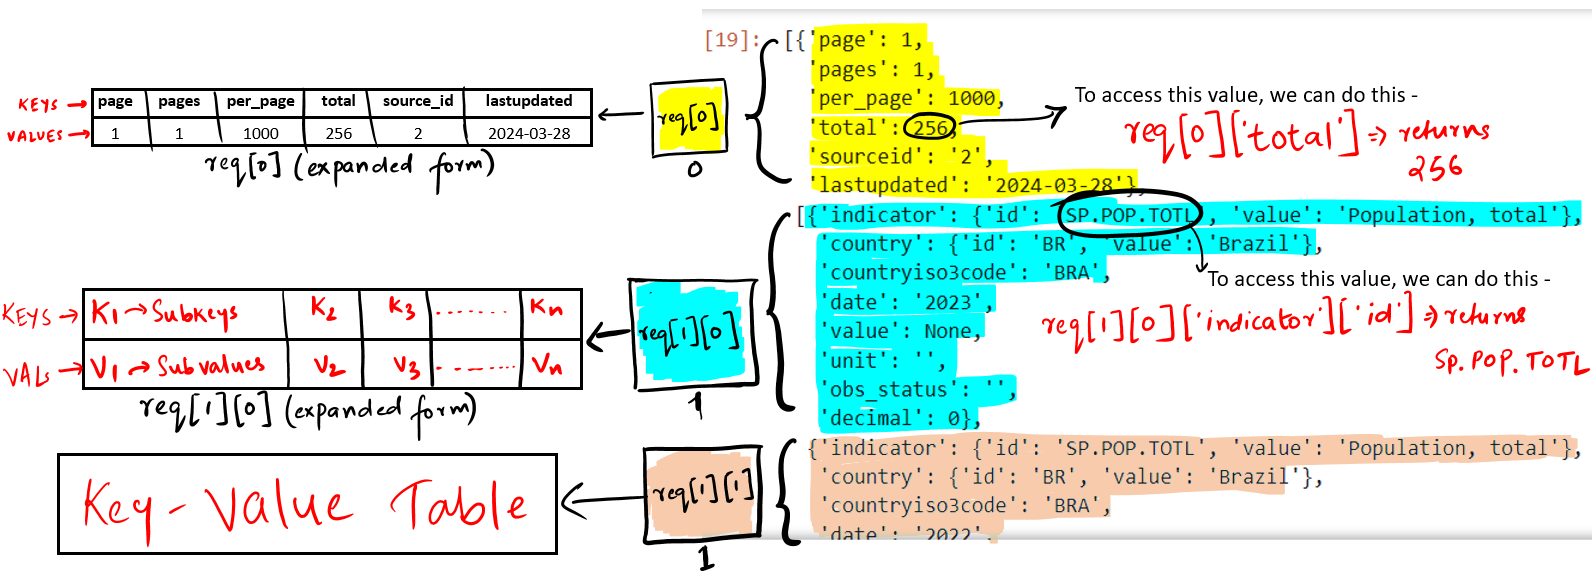

After looking at the json object, we understand that we don't actually need the metadata but instead need the actual data (req[1][n]) for different countries. 
<br>So, let's store this data in a pandas dataframe.

In [17]:
# Using pandas to store the data of json object in the dataframe.

df_api = pd.DataFrame(req[1])

In [18]:
# Checking whether the dataset is imported or not

df_api

indicator  \
0    {'id': 'SP.POP.TOTL', 'value': 'Population, to...   
1    {'id': 'SP.POP.TOTL', 'value': 'Population, to...   
2    {'id': 'SP.POP.TOTL', 'value': 'Population, to...   
3    {'id': 'SP.POP.TOTL', 'value': 'Population, to...   
4    {'id': 'SP.POP.TOTL', 'value': 'Population, to...   
..                                                 ...   
251  {'id': 'SP.POP.TOTL', 'value': 'Population, to...   
252  {'id': 'SP.POP.TOTL', 'value': 'Population, to...   
253  {'id': 'SP.POP.TOTL', 'value': 'Population, to...   
254  {'id': 'SP.POP.TOTL', 'value': 'Population, to...   
255  {'id': 'SP.POP.TOTL', 'value': 'Population, to...   

                                    country countryiso3code  date  \
0           {'id': 'BR', 'value': 'Brazil'}             BRA  2023   
1           {'id': 'BR', 'value': 'Brazil'}             BRA  2022   
2           {'id': 'BR', 'value': 'Brazil'}             BRA  2021   
3           {'id': 'BR', 'value': 'Brazil'}             BRA  2020   
4           {'id': 'BR', 'value': 'Brazil'}             BRA  2019   
..                                      ...             ...   ...   
251  {'id': 'US', 'value': 'United States'}             USA  1964   
252  {'id': 'US', 'value': 'United States'}             USA  1963   
253  {'id': 'US', 'value': 'United States'}             USA  1962   
254  {'id': 'US', 'value': 'United States'}             USA  1961   
255  {'id': 'US', 'value': 'United States'}             USA  1960   

           value unit obs_status  decimal  
0            NaN                        0  
1    215313498.0                        0  
2    214326223.0                        0  
3    213196304.0                        0  
4    211782878.0                        0  
..           ...  ...        ...      ...  
251  191889000.0                        0  
252  189242000.0                        0  
253  186538000.0                        0  
254  183691000.0                        0  
255  180671000.0                        0  

[256 rows x 8 columns]

Voila! we have imported data from an API into the pandas dataframe.
<br>There are some issues with this dataframe (the country and indicator variables don't look particularly useful in their current form), but - dealing with those issues would come in the transform stage.

Right now we are more concerned about "how we extract data from an API" 
<br> Which we just did now!
<br> Not that hard! Right?

#### 2.2.1 Importing data from JSON files directly
Sometimes we might get a raw JSON file from which we have to directly extract the data and store it in the pandas dataframe.
<br> Hmmm, how can we do it?

Trust me it's very simple - if you have understood the previous part then this will be a cakewalk for you!

We'll extract the same population data, except the data will be in a different format.

#### Let's start this process!

In [19]:
# Before actually importing the data, let's first just open the file and see the values inside it - if everything is fine then we'll import the data
# Creating a function which will read a file and print the data inside a JSON line by line

def print_lines(n, file_path): #we pass two parameters - "n" for the no. of lines to be printed & "file_path" which basically is the location of file
    f = open(file_path) #opening the file connection by creating a file object named "f"
    for i in range(n): #for loop for iterating over the lines
        print(f.readline()) #printing every line with the readline() method 
    f.close() #closing the file connection manually

In [20]:
# Calling the function to print the lines of the JSON file

print_lines(1, 'C:/Users/Admin/Downloads/ETL Project/kaggle/input/population_data.json')

[{"Country Name":"Aruba","Country Code":"ABW","Indicator Name":"Population, total","Indicator Code":"SP.POP.TOTL","1960":54211.0,"1961":55438.0,"1962":56225.0,"1963":56695.0,"1964":57032.0,"1965":57360.0,"1966":57715.0,"1967":58055.0,"1968":58386.0,"1969":58726.0,"1970":59063.0,"1971":59440.0,"1972":59840.0,"1973":60243.0,"1974":60528.0,"1975":60657.0,"1976":60586.0,"1977":60366.0,"1978":60103.0,"1979":59980.0,"1980":60096.0,"1981":60567.0,"1982":61345.0,"1983":62201.0,"1984":62836.0,"1985":63026.0,"1986":62644.0,"1987":61833.0,"1988":61079.0,"1989":61032.0,"1990":62149.0,"1991":64622.0,"1992":68235.0,"1993":72504.0,"1994":76700.0,"1995":80324.0,"1996":83200.0,"1997":85451.0,"1998":87277.0,"1999":89005.0,"2000":90853.0,"2001":92898.0,"2002":94992.0,"2003":97017.0,"2004":98737.0,"2005":100031.0,"2006":100832.0,"2007":101220.0,"2008":101353.0,"2009":101453.0,"2010":101669.0,"2011":102053.0,"2012":102577.0,"2013":103187.0,"2014":103795.0,"2015":104341.0,"2016":104822.0,"2017":105264.0},{"

In [21]:
#Another way to print the lines of a JSON file - usign the json library and load() method
import json

with open('C:/Users/Admin/Downloads/ETL Project/kaggle/input/population_data.json') as f:
    json_data = json.load(f)

print(json_data[0]) # the index can go till [len(json_data) - 1] which is nothing but the last line in the JSON file
print('\n')
print(json_data[0]['Country Name']) # accessing a value based on the key by parsing through the data

{'Country Name': 'Aruba', 'Country Code': 'ABW', 'Indicator Name': 'Population, total', 'Indicator Code': 'SP.POP.TOTL', '1960': 54211.0, '1961': 55438.0, '1962': 56225.0, '1963': 56695.0, '1964': 57032.0, '1965': 57360.0, '1966': 57715.0, '1967': 58055.0, '1968': 58386.0, '1969': 58726.0, '1970': 59063.0, '1971': 59440.0, '1972': 59840.0, '1973': 60243.0, '1974': 60528.0, '1975': 60657.0, '1976': 60586.0, '1977': 60366.0, '1978': 60103.0, '1979': 59980.0, '1980': 60096.0, '1981': 60567.0, '1982': 61345.0, '1983': 62201.0, '1984': 62836.0, '1985': 63026.0, '1986': 62644.0, '1987': 61833.0, '1988': 61079.0, '1989': 61032.0, '1990': 62149.0, '1991': 64622.0, '1992': 68235.0, '1993': 72504.0, '1994': 76700.0, '1995': 80324.0, '1996': 83200.0, '1997': 85451.0, '1998': 87277.0, '1999': 89005.0, '2000': 90853.0, '2001': 92898.0, '2002': 94992.0, '2003': 97017.0, '2004': 98737.0, '2005': 100031.0, '2006': 100832.0, '2007': 101220.0, '2008': 101353.0, '2009': 101453.0, '2010': 101669.0, '2011'

We observe that there is only one line in this JSON file which has all the values for every country!
<br> Which means that the for loop runs only once and prints the entire data using pandas.

<br>Alright, then - let's now import it into the pandas dataframe.

If you open the link with the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html), you'll see there is an orient option that can handle JSON formatted in different ways:
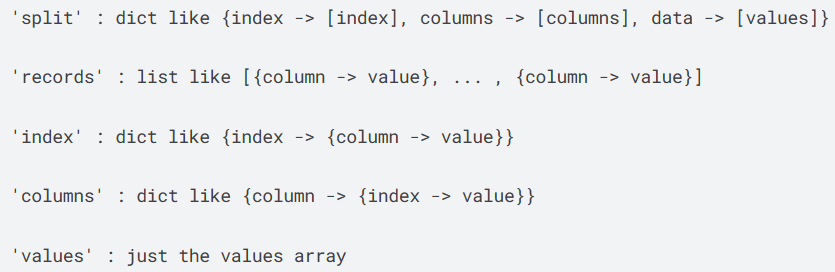

<br>In this case, the JSON is formatted with a 'records' orientation, so you'll need to use that value in the read_json() method. You can tell that the format is 'records' by comparing the pattern in the documentation with the pattern in the JSON file.

In [22]:
#Reading the JSON file using PANDAS (Orient parameter has different inputs based on the file structure)

df_json = pd.read_json('C:/Users/Admin/Downloads/ETL Project/kaggle/input/population_data.json', orient = 'records')

In [23]:
# Checking whether the dataset is imported or not

df_json.head()

Country Name Country Code     Indicator Name Indicator Code       1960  \
0        Aruba          ABW  Population, total    SP.POP.TOTL    54211.0   
1  Afghanistan          AFG  Population, total    SP.POP.TOTL  8996351.0   
2       Angola          AGO  Population, total    SP.POP.TOTL  5643182.0   
3      Albania          ALB  Population, total    SP.POP.TOTL  1608800.0   
4      Andorra          AND  Population, total    SP.POP.TOTL    13411.0   

        1961       1962       1963       1964       1965  ...        2008  \
0    55438.0    56225.0    56695.0    57032.0    57360.0  ...    101353.0   
1  9166764.0  9345868.0  9533954.0  9731361.0  9938414.0  ...  27294031.0   
2  5753024.0  5866061.0  5980417.0  6093321.0  6203299.0  ...  21759420.0   
3  1659800.0  1711319.0  1762621.0  1814135.0  1864791.0  ...   2947314.0   
4    14375.0    15370.0    16412.0    17469.0    18549.0  ...     83861.0   

         2009        2010        2011        2012        2013        2014  \
0    101453.0    101669.0    102053.0    102577.0    103187.0    103795.0   
1  28004331.0  28803167.0  29708599.0  30696958.0  31731688.0  32758020.0   
2  22549547.0  23369131.0  24218565.0  25096150.0  25998340.0  26920466.0   
3   2927519.0   2913021.0   2905195.0   2900401.0   2895092.0   2889104.0   
4     84462.0     84449.0     83751.0     82431.0     80788.0     79223.0   

         2015        2016        2017  
0    104341.0    104822.0    105264.0  
1  33736494.0  34656032.0  35530081.0  
2  27859305.0  28813463.0  29784193.0  
3   2880703.0   2876101.0   2873457.0  
4     78014.0     77281.0     76965.0  

[5 rows x 62 columns]

And, that's it! 
<br> This is how you import data from a JSON file into the pandas dataframe - you'll need the function "**read_json()**" to do so.

#### 2.2.2 Importing data from XML files directly
XML looks very similar to HTML. XML is formatted with tags having values inside the tags. XML is not as easy to navigate as JSON. Pandas cannot read in XML directly. One reason is that tag names are user defined. Every XML file might have different formatting. You can imagine why XML has fallen out of favor relative to JSON.

##### Let's start this process!

__How to read and navigate XML__
<br>
There is a Python library called BeautifulSoup, which makes reading in and parsing XML data easier.
<br> Here is the link to the documentation:[ Beautiful Soup Documentatio](https://www.crummy.com/software/BeautifulSoup/)n

The find() method will find the first place where an xml element occurs. For example using find('record') will return the first records in the XML file - 
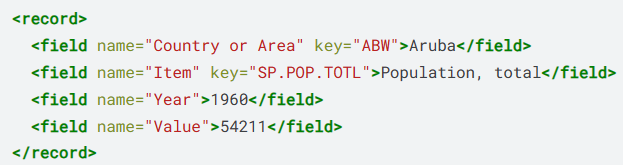

<br>The find_all() method returns all of the matching tags. So find_all('record') would return all of the elements with the __<"record">__ tag.

In [24]:
# !pip install bs4
# !pip install lxml

from bs4 import BeautifulSoup

# Open the XML file and load into BeautifulSoup
with open("C:/Users/Admin/Downloads/ETL Project/kaggle/input/population_data.xml") as fp:
    soup = BeautifulSoup(fp, "lxml")  # lxml is the parser type

# Create an empty list to store data
data = []

# Use the find_all method to get all record tags in the document
for record in soup.find_all('record'):
    record_data = {}  # Create a dictionary to store field data for each record
    
    # Use the find_all method to get all fields in each record
    for field in record.find_all('field'):
        record_data[field['name']] = field.text  # Store field data in the dictionary
    
    data.append(record_data)  # Append the record data dictionary to the list

# Convert the list of dictionaries into a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df

Country or Area               Item  Year     Value
0               Aruba  Population, total  1960     54211
1               Aruba  Population, total  1961     55438
2               Aruba  Population, total  1962     56225
3               Aruba  Population, total  1963     56695
4               Aruba  Population, total  1964     57032
...               ...                ...   ...       ...
15307        Zimbabwe  Population, total  2013  15054506
15308        Zimbabwe  Population, total  2014  15411675
15309        Zimbabwe  Population, total  2015  15777451
15310        Zimbabwe  Population, total  2016  16150362
15311        Zimbabwe  Population, total  2017  16529904

[15312 rows x 4 columns]

##### In this code - 
- We open the XML file and load it into BeautifulSoup.
- We iterate through each "record" tag in the XML file.
- For each "record" tag, we iterate through each "field" tag and extract the field name and text content.
- We store the field data in a dictionary "record_data" and append it to a list "data".
- After processing all records, we convert the list of dictionaries "data" into a dataframe "df"

##### And, that's it! We have successfully imported the data from XML file into a pandas dataframe.
Let's move onto the next type of input source - __DATABASES (Sqlite3, PostgreSQL)__

### 2.3 Importing data from databases
Databases are one of the most important sources of data in today's world. Any platform where we can store and manage data is basically called a database. 
<br>You can use Pandas to open a SQL database or to run a SQL query against a database. In this section, we will focus on two types of databases - 
- Sqlite
- PostgreSQL

The major difference between these two is shown in the comparison table below -
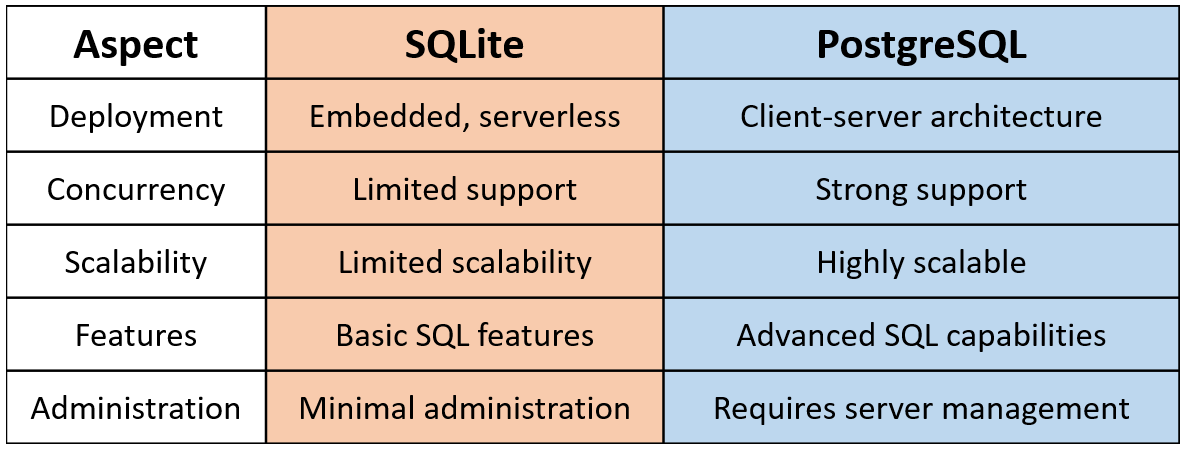

#### 2.3.1 Importing data from a SQLite database 
Here, we will use a DB file which already has some data in it (file_name = population_data.db).
<br><br>This process happens in 4 steps - 
- Import the sqlite3 module, which provides an interface for working with SQLite databases in python
- Establish a connection to a SQLite database located at file_path - using connect ()
- Execute a SQL query against the connected database - using read_sql ()
- The result of the query is stored in a dataframe

In [25]:
import sqlite3

#connection to the database 
conn = sqlite3.connect('C:/Users/Admin/Downloads/ETL Project/kaggle/input/population_data.db')

#run a query
df_sqlite = pd.read_sql('SELECT * FROM population_data', conn)

In [26]:
# Checking whether the dataset is imported or not

df_sqlite.head()

index Country_Name Country_Code     Indicator_Name Indicator_Code  \
0      0        Aruba          ABW  Population, total    SP.POP.TOTL   
1      1  Afghanistan          AFG  Population, total    SP.POP.TOTL   
2      2       Angola          AGO  Population, total    SP.POP.TOTL   
3      3      Albania          ALB  Population, total    SP.POP.TOTL   
4      4      Andorra          AND  Population, total    SP.POP.TOTL   

        1960       1961       1962       1963       1964  ...        2008  \
0    54211.0    55438.0    56225.0    56695.0    57032.0  ...    101353.0   
1  8996351.0  9166764.0  9345868.0  9533954.0  9731361.0  ...  27294031.0   
2  5643182.0  5753024.0  5866061.0  5980417.0  6093321.0  ...  21759420.0   
3  1608800.0  1659800.0  1711319.0  1762621.0  1814135.0  ...   2947314.0   
4    13411.0    14375.0    15370.0    16412.0    17469.0  ...     83861.0   

         2009        2010        2011        2012        2013        2014  \
0    101453.0    101669.0    102053.0    102577.0    103187.0    103795.0   
1  28004331.0  28803167.0  29708599.0  30696958.0  31731688.0  32758020.0   
2  22549547.0  23369131.0  24218565.0  25096150.0  25998340.0  26920466.0   
3   2927519.0   2913021.0   2905195.0   2900401.0   2895092.0   2889104.0   
4     84462.0     84449.0     83751.0     82431.0     80788.0     79223.0   

         2015        2016        2017  
0    104341.0    104822.0    105264.0  
1  33736494.0  34656032.0  35530081.0  
2  27859305.0  28813463.0  29784193.0  
3   2880703.0   2876101.0   2873457.0  
4     78014.0     77281.0     76965.0  

[5 rows x 63 columns]

And, done! We have successfully imported the data from a SQLite DB into a pandas dataframe.
<br><br>Let's now look at how we can do the same in PostgreSQL!

#### 2.3.2 Importing data from a PostgreSQL database 
Here, we will use a table named "Employee" in the DB named "Newdb" of PostgreSQL. The major steps are - 
- Establishing a connection to the PsotgreSQL DB
- Creating a cursor object to interact with the DB
- Executing a SQL query to retrieve data from the "Employee" table
- Fetching all rows from the result set
- Committing changes and closing connection
- Fetching column names from the cursor description
- Creating an empty dataframe with fetched column names
- Populating the dataframe with the fetched rows
- Displaying the DataFrame

Below shown image sumarises the entire process - 
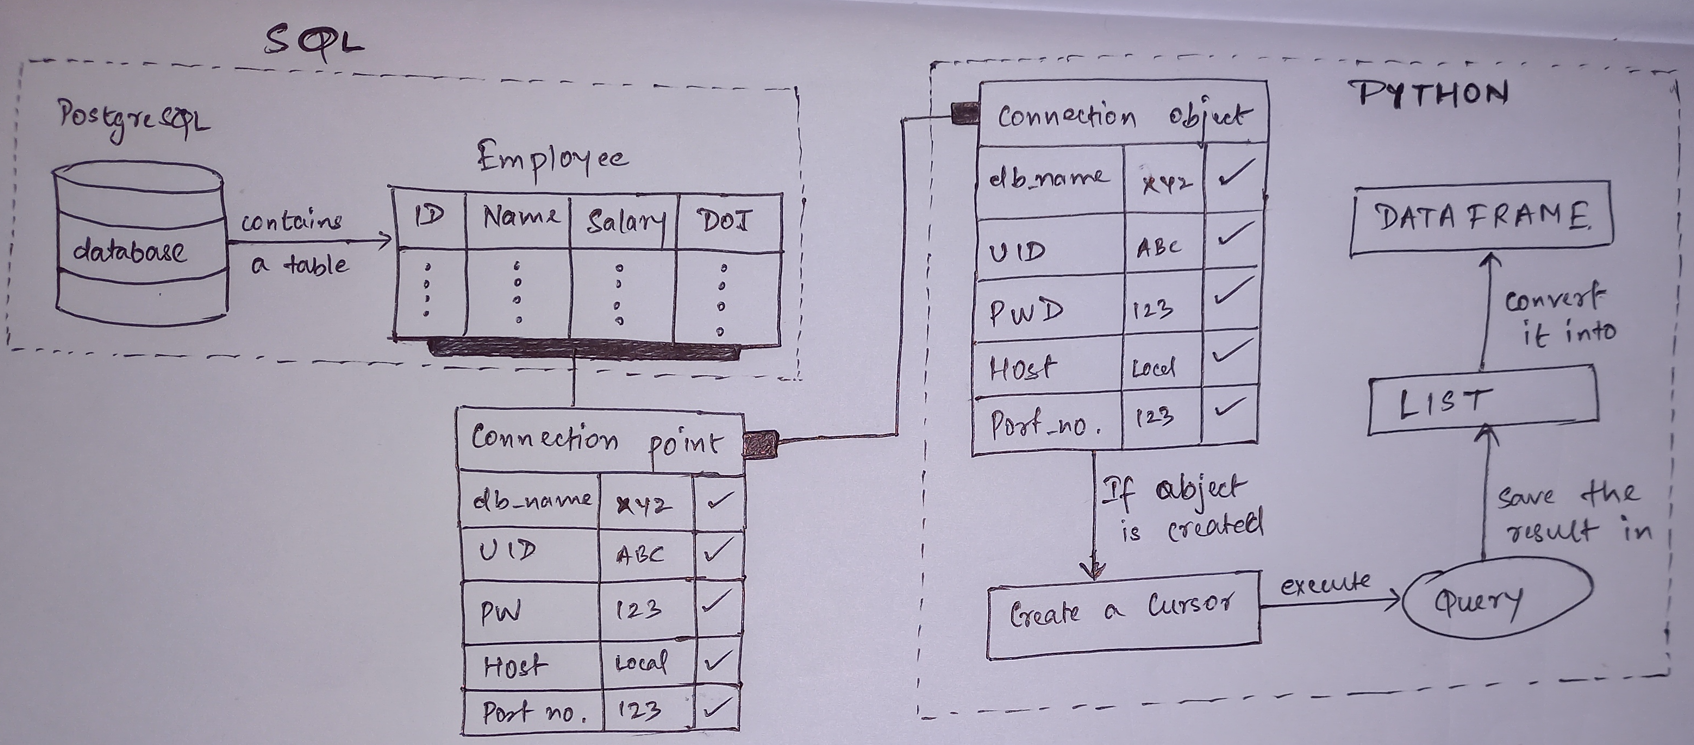
Let's do this and see how it works!

We want to import this table (which is present in PostgreSQL) into a dataframe - 
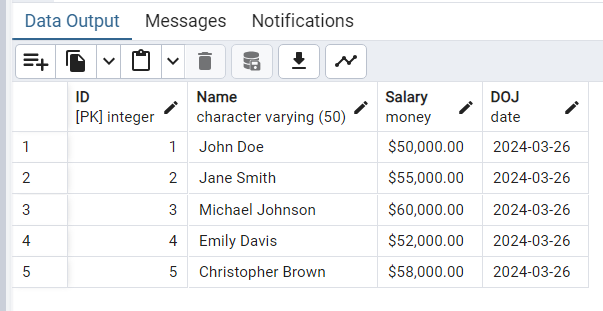

In [27]:
#Importing the necessary libraries

import psycopg2

# Establishing the connection
conn = psycopg2.connect(
   database="Newdb", user='postgres', password='Ankit@1998', host='localhost', port= '5432'
)

# Setting auto commit to False
conn.autocommit = False

# Creating a cursor object using the cursor() method
cursor = conn.cursor()

# Retrieving data
cursor.execute('''SELECT * FROM public."Employee" ''')

# Fetching all rows from the table
result1 = cursor.fetchall()

# Committing changes in the database
conn.commit()

# Closing the connection
conn.close()

# Fetching column names from the cursor description
column_names = [desc[0] for desc in cursor.description]

In [28]:
# Creating an empty DataFrame with column names
db_df = pd.DataFrame(columns=column_names)

# Populating the DataFrame with fetched rows
db_df = pd.DataFrame(result1, columns=column_names)

In [29]:
# Displaying the DataFrame
db_df

ID               Name      Salary         DOJ
0   1           John Doe  $50,000.00  2024-03-26
1   2         Jane Smith  $55,000.00  2024-03-26
2   3    Michael Johnson  $60,000.00  2024-03-26
3   4        Emily Davis  $52,000.00  2024-03-26
4   5  Christopher Brown  $58,000.00  2024-03-26

And we are done with the __Extract__ stage of the ETL process!
We basically fetched the data from different sources (such as CSvs, APIs, JSONs, XMLs, SQLite DBs and PostgreSQL DBs) into the pandas dataframe.

Once we have all the data required in the dataframe - we will start working on its transformation phase (where the data will be processed in order to get some uniformity as well as analysis-ready).

#### Let's start the next stage then!
## **3. Stage 2 - TRANSFORM**

**Meaning** -  process of modifying the collected data to enhance its usefulness. It involves tasks such as cleaning up the data, organizing it, and possibly merging it with other datasets.

Once we have understood the meaning of the "Transform" stage. We will now begin implementing different methods in it.

### 3.1 Combining two datasets
There are two csv files - 
 - rural_population_percent.csv
 - electricity_access_percent.csv

__NOTE__ - both of them have the same no. of columns (63), same column headers in the same order and the values are in percentage.

This means that we can combine them together. By combining I mean placing one below the other. The image depicts the same -
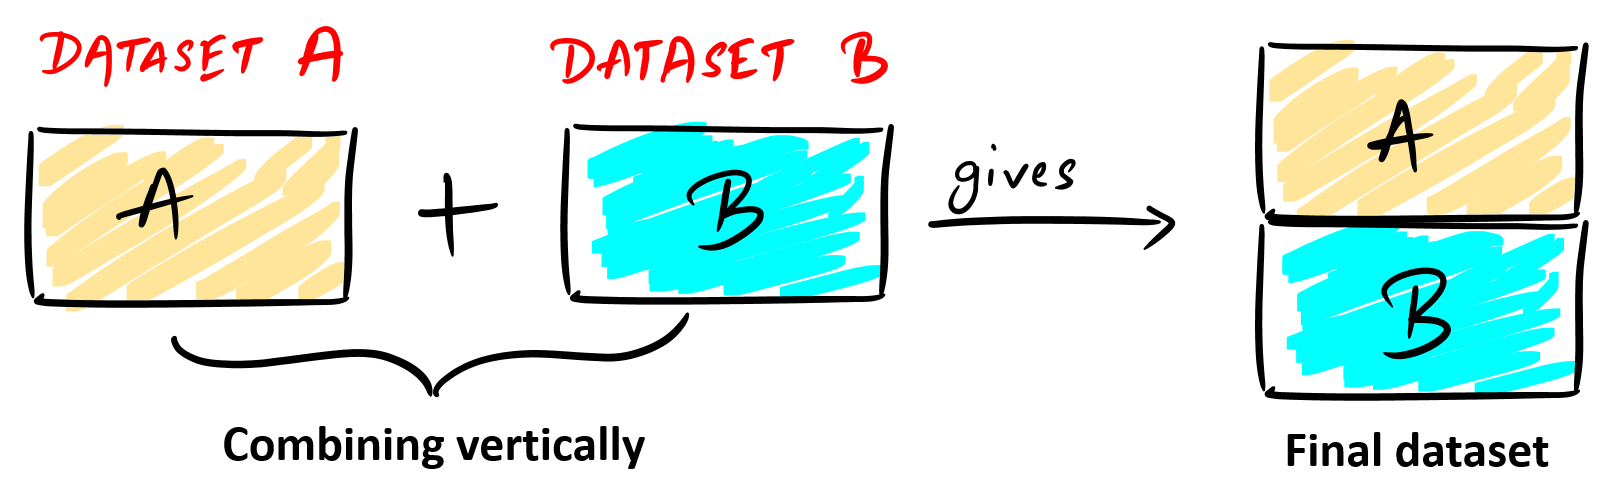

Let's start doing it then?

In [30]:
# Reading the data in the CSV file into the pandas dataframe by skipping the starting 4 rows (why are we skipping 4 rows? - try opening the file)

df_rural = pd.read_csv('C:/Users/Admin/Downloads/ETL Project/kaggle/input/rural_population_percent.csv', skiprows = 4)
df_rural

Country Name Country Code                            Indicator Name  \
0           Aruba          ABW  Rural population (% of total population)   
1     Afghanistan          AFG  Rural population (% of total population)   
2          Angola          AGO  Rural population (% of total population)   
3         Albania          ALB  Rural population (% of total population)   
4         Andorra          AND  Rural population (% of total population)   
..            ...          ...                                       ...   
259        Kosovo          XKX  Rural population (% of total population)   
260   Yemen, Rep.          YEM  Rural population (% of total population)   
261  South Africa          ZAF  Rural population (% of total population)   
262        Zambia          ZMB  Rural population (% of total population)   
263      Zimbabwe          ZWE  Rural population (% of total population)   

     Indicator Code    1960    1961    1962    1963    1964    1965  ...  \
0    SP.RUR.TOTL.ZS  49.224  49.239  49.254  49.270  49.285  49.300  ...   
1    SP.RUR.TOTL.ZS  91.779  91.492  91.195  90.890  90.574  90.250  ...   
2    SP.RUR.TOTL.ZS  89.565  89.202  88.796  88.376  87.942  87.496  ...   
3    SP.RUR.TOTL.ZS  69.295  69.057  68.985  68.914  68.842  68.770  ...   
4    SP.RUR.TOTL.ZS  41.550  39.017  36.538  34.128  31.795  29.555  ...   
..              ...     ...     ...     ...     ...     ...     ...  ...   
259  SP.RUR.TOTL.ZS     NaN     NaN     NaN     NaN     NaN     NaN  ...   
260  SP.RUR.TOTL.ZS  90.900  90.541  90.169  89.784  89.386  88.974  ...   
261  SP.RUR.TOTL.ZS  53.381  53.207  53.094  52.980  52.866  52.752  ...   
262  SP.RUR.TOTL.ZS  81.855  81.049  80.215  79.288  77.985  76.628  ...   
263  SP.RUR.TOTL.ZS  87.392  87.179  86.918  86.422  85.908  85.380  ...   

       2009    2010    2011    2012    2013    2014    2015    2016    2017  \
0    56.579  56.941  57.302  57.636  57.942  58.221  58.472  58.696  58.893   
1    75.687  75.311  74.926  74.532  74.129  73.718  73.297  72.868  72.430   
2    60.701  59.903  59.100  58.301  57.510  56.726  55.950  55.181  54.422   
3    48.924  47.837  46.753  45.670  44.617  43.591  42.593  41.624  40.684   
4    11.648  12.183  12.740  13.292  13.835  14.367  14.885  15.388  15.873   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
259     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
260  68.835  68.268  67.698  67.126  66.550  65.973  65.394  64.813  64.231   
261  38.313  37.782  37.254  36.728  36.212  35.702  35.199  34.705  34.218   
262  61.701  61.275  60.847  60.413  59.973  59.528  59.078  58.621  58.160   
263  66.622  66.804  66.985  67.166  67.346  67.499  67.624  67.723  67.793   

     Unnamed: 62  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
..           ...  
259          NaN  
260          NaN  
261          NaN  
262          NaN  
263          NaN  

[264 rows x 63 columns]

In [31]:
# Reading the data in the CSV file into the pandas dataframe by skipping the starting 4 rows (why are we skipping 4 rows? - try opening the file)

df_electricity = pd.read_csv('C:/Users/Admin/Downloads/ETL Project/kaggle/input/electricity_access_percent.csv', skiprows = 4)
df_electricity

Country Name Country Code                           Indicator Name  \
0           Aruba          ABW  Access to electricity (% of population)   
1     Afghanistan          AFG  Access to electricity (% of population)   
2          Angola          AGO  Access to electricity (% of population)   
3         Albania          ALB  Access to electricity (% of population)   
4         Andorra          AND  Access to electricity (% of population)   
..            ...          ...                                      ...   
259        Kosovo          XKX  Access to electricity (% of population)   
260   Yemen, Rep.          YEM  Access to electricity (% of population)   
261  South Africa          ZAF  Access to electricity (% of population)   
262        Zambia          ZMB  Access to electricity (% of population)   
263      Zimbabwe          ZWE  Access to electricity (% of population)   

     Indicator Code  1960  1961  1962  1963  1964  1965  ...        2009  \
0    EG.ELC.ACCS.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   93.354546   
1    EG.ELC.ACCS.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   44.854885   
2    EG.ELC.ACCS.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   32.382469   
3    EG.ELC.ACCS.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...  100.000000   
4    EG.ELC.ACCS.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...  100.000000   
..              ...   ...   ...   ...   ...   ...   ...  ...         ...   
259  EG.ELC.ACCS.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   98.377060   
260  EG.ELC.ACCS.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   61.751400   
261  EG.ELC.ACCS.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   82.700000   
262  EG.ELC.ACCS.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   23.235649   
263  EG.ELC.ACCS.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   43.369082   

           2010        2011        2012        2013        2014        2015  \
0     93.356292   93.942375   94.255814   94.578262   94.906723   95.238182   
1     42.700000   43.222019   69.100000   67.259552   89.500000   71.500000   
2     33.514950   34.600000   35.821964   36.990490   32.000000   42.000000   
3    100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
4    100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
..          ...         ...         ...         ...         ...         ...   
259    0.000000   99.430435   99.773651   99.942505   99.993134  100.000000   
260   63.134281   64.532181   65.942101   75.600000   66.100000   70.213905   
261   82.900000   84.700000   85.300000   85.400000   86.000000   85.500000   
262   22.000000   24.328644   24.894667   25.469702   27.900000   31.100000   
263   36.063057   36.900000   36.728878   37.076813   32.300000   33.700000   

           2016  2017  Unnamed: 62  
0     95.570145   NaN          NaN  
1     84.137138   NaN          NaN  
2     40.520607   NaN          NaN  
3    100.000000   NaN          NaN  
4    100.000000   NaN          NaN  
..          ...   ...          ...  
259  100.000000   NaN          NaN  
260   71.642349   NaN          NaN  
261   84.200000   NaN          NaN  
262   27.219337   NaN          NaN  
263   38.145138   NaN          NaN  

[264 rows x 63 columns]

After going through the data, we figure out that both the datasets have a column named "Unnamed: 62" that has only Null values (using the isnull().sum() function).
<br> We can __drop__ this column from both the datasets.

In [32]:
# Using the drop () method to delete the column named "Unnamed:62" from both the datasets
# Here axis = 1 means we wanna apply the drop function on columns & inplace = True means that we need the changes to be made in the same dataframe

df_rural.drop('Unnamed: 62', axis = 1, inplace = True)
df_electricity.drop('Unnamed: 62', axis = 1, inplace = True)

In [33]:
# Now, we can combine these two dataframes and then use the final dataframe for any analysis (if needed)

df_final = pd.concat([df_rural, df_electricity]) #we use the concat function to combine the two dataframes

In [34]:
# Let's check if we have got the final combined dataset.

df_final

Country Name Country Code                            Indicator Name  \
0           Aruba          ABW  Rural population (% of total population)   
1     Afghanistan          AFG  Rural population (% of total population)   
2          Angola          AGO  Rural population (% of total population)   
3         Albania          ALB  Rural population (% of total population)   
4         Andorra          AND  Rural population (% of total population)   
..            ...          ...                                       ...   
259        Kosovo          XKX   Access to electricity (% of population)   
260   Yemen, Rep.          YEM   Access to electricity (% of population)   
261  South Africa          ZAF   Access to electricity (% of population)   
262        Zambia          ZMB   Access to electricity (% of population)   
263      Zimbabwe          ZWE   Access to electricity (% of population)   

     Indicator Code    1960    1961    1962    1963    1964    1965  ...  \
0    SP.RUR.TOTL.ZS  49.224  49.239  49.254  49.270  49.285  49.300  ...   
1    SP.RUR.TOTL.ZS  91.779  91.492  91.195  90.890  90.574  90.250  ...   
2    SP.RUR.TOTL.ZS  89.565  89.202  88.796  88.376  87.942  87.496  ...   
3    SP.RUR.TOTL.ZS  69.295  69.057  68.985  68.914  68.842  68.770  ...   
4    SP.RUR.TOTL.ZS  41.550  39.017  36.538  34.128  31.795  29.555  ...   
..              ...     ...     ...     ...     ...     ...     ...  ...   
259  EG.ELC.ACCS.ZS     NaN     NaN     NaN     NaN     NaN     NaN  ...   
260  EG.ELC.ACCS.ZS     NaN     NaN     NaN     NaN     NaN     NaN  ...   
261  EG.ELC.ACCS.ZS     NaN     NaN     NaN     NaN     NaN     NaN  ...   
262  EG.ELC.ACCS.ZS     NaN     NaN     NaN     NaN     NaN     NaN  ...   
263  EG.ELC.ACCS.ZS     NaN     NaN     NaN     NaN     NaN     NaN  ...   

          2008       2009       2010       2011       2012       2013  \
0    56.217000  56.579000  56.941000  57.302000  57.636000  57.942000   
1    76.054000  75.687000  75.311000  74.926000  74.532000  74.129000   
2    61.491000  60.701000  59.903000  59.100000  58.301000  57.510000   
3    50.009000  48.924000  47.837000  46.753000  45.670000  44.617000   
4    11.133000  11.648000  12.183000  12.740000  13.292000  13.835000   
..         ...        ...        ...        ...        ...        ...   
259  97.794670  98.377060   0.000000  99.430435  99.773651  99.942505   
260  60.386539  61.751400  63.134281  64.532181  65.942101  75.600000   
261  81.900000  82.700000  82.900000  84.700000  85.300000  85.400000   
262  22.714685  23.235649  22.000000  24.328644  24.894667  25.469702   
263  35.457310  43.369082  36.063057  36.900000  36.728878  37.076813   

          2014        2015        2016    2017  
0    58.221000   58.472000   58.696000  58.893  
1    73.718000   73.297000   72.868000  72.430  
2    56.726000   55.950000   55.181000  54.422  
3    43.591000   42.593000   41.624000  40.684  
4    14.367000   14.885000   15.388000  15.873  
..         ...         ...         ...     ...  
259  99.993134  100.000000  100.000000     NaN  
260  66.100000   70.213905   71.642349     NaN  
261  86.000000   85.500000   84.200000     NaN  
262  27.900000   31.100000   27.219337     NaN  
263  32.300000   33.700000   38.145138     NaN  

[528 rows x 62 columns]

Notice that the number of rows has increased to 528 instead of 264, hence it means that the dataframes are combined together. 

And that's it! That's how we can combine any two or more datasets together (given the condition that they have same headers, order and no. of columns) - if not then you can create a dataframe on your own with the relevant columns and then combine them together.

### 3.2 Cleaning data
Every data set might have its own issues whether that involves missing values, duplicated entries, data entry mistakes, etc. In this section, I'll do some data cleaning on the World Bank projects and World Bank indicators data sets.

Currently, the projects data and the indicators data have __different values for "country names"__. Check the image below for more clarity -
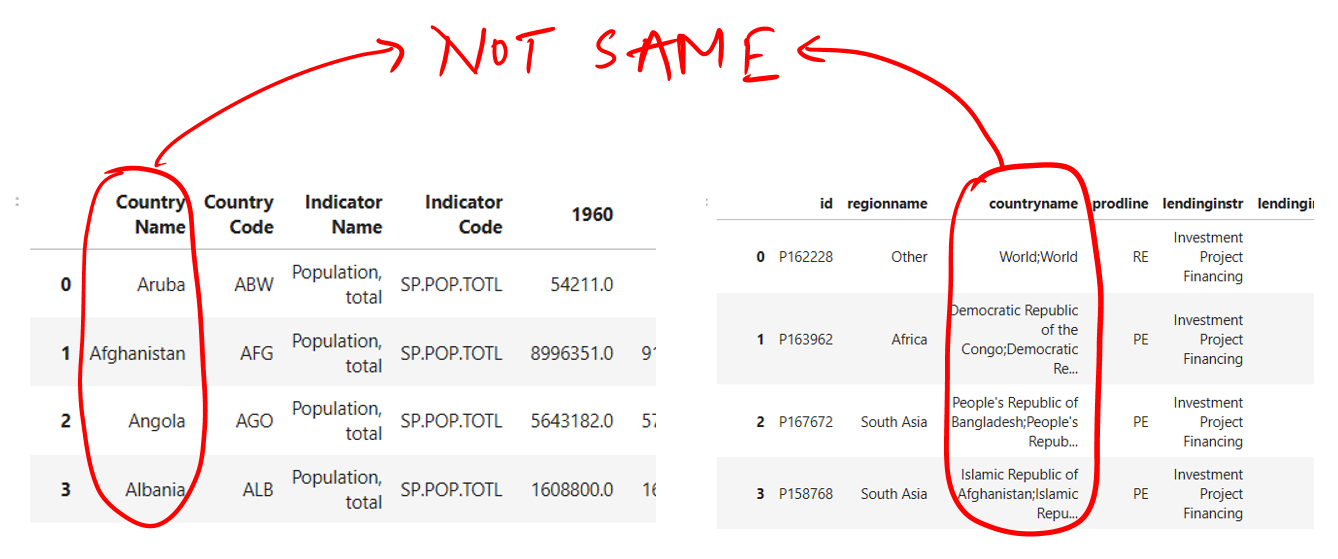

We will clean both data sets so that they have consistent country names. This will allow us to join the two data sets together (when required).

In [35]:
# Reading the data from CSV files into pandas dataframe and skipping the first 4 rows

df_indicator = pd.read_csv('C:/Users/Admin/Downloads/ETL Project/kaggle/input/population_data.csv', skiprows = 4)
df_indicator.drop('Unnamed: 62', axis = 1, inplace = True)

df_projects = pd.read_csv('C:/Users/Admin/Downloads/ETL Project/kaggle/input/projects_data.csv', dtype = 'str')
df_projects.drop('Unnamed: 56', axis = 1, inplace = True)

In [36]:
# Output the unique country names and ISO abbreviations in the population indicator data set.

df_indicator[['Country Name', 'Country Code']].drop_duplicates()

Country Name Country Code
0           Aruba          ABW
1     Afghanistan          AFG
2          Angola          AGO
3         Albania          ALB
4         Andorra          AND
..            ...          ...
259        Kosovo          XKX
260   Yemen, Rep.          YEM
261  South Africa          ZAF
262        Zambia          ZMB
263      Zimbabwe          ZWE

[264 rows x 2 columns]

Now, let's see the unique country names in the project data set as well. We need to focus on 'countryname' column only.

__Please NOTE the following things__ -
- project dataset has another column for country - named as 'Country' (it only has NaN values) - ignore
- It would be easier to join the two data sets together if the projects data had the ISO country abbreviations like the indicator data has

##### . To join these two data sets together we essentially have two choice-
- add a column of ISO 3 codes to the projects data set
- find the difference between the projects data country names and indicator data country names

Then clean the data so that they are the same.

In [37]:
#Checking the unique country names in the projects dataset

df_projects['countryname'].unique()

array(['World;World',
       'Democratic Republic of the Congo;Democratic Republic of the Congo',
       "People's Republic of Bangladesh;People's Republic of Bangladesh",
       'Islamic  Republic of Afghanistan;Islamic  Republic of Afghanistan',
       'Federal Republic of Nigeria;Federal Republic of Nigeria',
       'Republic of Tunisia;Republic of Tunisia',
       'Lebanese Republic;Lebanese Republic',
       'Democratic Socialist Republic of Sri Lan;Democratic Socialist Republic of Sri Lan',
       'Nepal;Nepal', 'Kyrgyz Republic;Kyrgyz Republic',
       'Hashemite Kingdom of Jordan;Hashemite Kingdom of Jordan',
       'Republic of the Union of Myanmar;Republic of the Union of Myanmar',
       'Arab Republic of Egypt;Arab Republic of Egypt',
       'United Republic of Tanzania;United Republic of Tanzania',
       'Federal Democratic Republic of Ethiopia;Federal Democratic Republic of Ethiopia',
       'Burkina Faso;Burkina Faso',
       'Republic of Uzbekistan;Republic of Uzbekist

Did you notice a pattern in the projects data country names? 

The entries are repeated and separated by a semi-colon like this:
<br>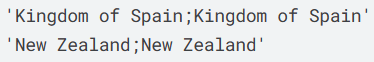

The first step is to clean the country name column and get rid of the semi-colon.

In [38]:
# Adding a new column named "Official country name" in the existing "df_projects" data frame
# We use first access a value in the "countryname" column, convert it into a string, split it using ";" as the delimeter and finally get the value  

df_projects['Official Country Name'] = df_projects['countryname'].str.split(';').str.get(0)

The goal is to add the ISO codes to the projects data set. This can be done using pycountry library.<br>__pycountry__ -  A Python library to access ISO country, subdivision, language, currency and script definitions and their translations.

##### We can do this via these steps - 
- Iterate through unique countries in 'Official Country Name' column
- Create a dictionary mapping the country name to the alpha_3 ISO abbreviations
<br>

The dictionary should look like: {'Kingdom of Spain':'ESP'}

If a country name cannot be found in the pycountry library, add it to a list called country_not_found.

In [39]:
# install and import the pycountry library
!pip install pycountry
from pycountry import countries

In [40]:
# set up the libraries and variables
from collections import defaultdict
country_not_found = [] # stores countries not found in the pycountry library
project_country_abbrev_dict = defaultdict(str) # set up an empty dictionary of string values

# iterate through the country names in df_projects. 
# Create a dictionary mapping the country name to the alpha_3 ISO code
for country in df_projects['Official Country Name'].drop_duplicates().sort_values():
    try: 
        # look up the country name in the pycountry library
        # store the country name as the dictionary key and the ISO-3 code as the value
        project_country_abbrev_dict[country] = countries.lookup(country).alpha_3
    except:
        # If the country name is not in the pycountry library, then print out the country name
        # And store the results in the country_not_found list
        print(country, ' not found')
        country_not_found.append(country)

Africa  not found
Andean Countries  not found
Aral Sea  not found
Asia  not found
Caribbean  not found
Caucasus  not found
Central Africa  not found
Central America  not found
Central Asia  not found
Co-operative Republic of Guyana  not found
Commonwealth of Australia  not found
Democratic Republic of Sao Tome and Prin  not found
Democratic Republic of the Congo  not found
Democratic Socialist Republic of Sri Lan  not found
EU Accession Countries  not found
East Asia and Pacific  not found
Eastern Africa  not found
Europe and Central Asia  not found
Islamic  Republic of Afghanistan  not found
Kingdom of Swaziland  not found
Latin America  not found
Macedonia  not found
Mekong  not found
Mercosur  not found
Middle East and North Africa  not found
Multi-Regional  not found
Organization of Eastern Caribbean States  not found
Oriental Republic of Uruguay  not found
Pacific Islands  not found
Red Sea and Gulf of Aden  not found
Republic of Congo  not found
Republic of Cote d'Ivoire  not fou

_Quite a few country names were not in the pycountry library. Some of these are regions like "South Asia" or "Southern Africa", so it makes sense that these would not show up in the pycountry library._

Perhaps some of these missing df_projects countries are already in the indicators data set. 
<br>Let's check if any of the countries in the country_not_found list are in the indicator list of countries.

In [41]:
# Storing the unique values of the columns "Country Name" and "Country Code" and then sorting them by "Country Name"
indicator_countries = df_indicator[['Country Name', 'Country Code']].drop_duplicates().sort_values(by = 'Country Name')

# Now, we just check whether country names in the list "country_not_found" are there in the unique country names which we stored in previous line
for country in country_not_found:
    if country in indicator_countries['Country Name'].tolist():
        print(country)

South Asia
St. Kitts and Nevis
St. Lucia
St. Vincent and the Grenadines
West Bank and Gaza
World


Unfortunately, there aren't too many country names that match between df_indicator and df_projects.

In order to solve the problem - we'll manually create a dictionary that maps all of the countries in "country_not_found" to the ISO-3 alpha codes

In [42]:
# creating the dictionary for manual mapping
country_not_found_mapping = {'Co-operative Republic of Guyana': 'GUY',
             'Commonwealth of Australia':'AUS',
             'Democratic Republic of Sao Tome and Prin':'STP',
             'Democratic Republic of the Congo':'COD',
             'Democratic Socialist Republic of Sri Lan':'LKA',
             'East Asia and Pacific':'EAS',
             'Europe and Central Asia': 'ECS',
             'Islamic  Republic of Afghanistan':'AFG',
             'Latin America':'LCN',
              'Caribbean':'LCN',
             'Macedonia':'MKD',
             'Middle East and North Africa':'MEA',
             'Oriental Republic of Uruguay':'URY',
             'Republic of Congo':'COG',
             "Republic of Cote d'Ivoire":'CIV',
             'Republic of Korea':'KOR',
             'Republic of Niger':'NER',
             'Republic of Kosovo':'XKX',
             'Republic of Rwanda':'RWA',
              'Republic of The Gambia':'GMB',
              'Republic of Togo':'TGO',
              'Republic of the Union of Myanmar':'MMR',
              'Republica Bolivariana de Venezuela':'VEN',
              'Sint Maarten':'SXM',
              "Socialist People's Libyan Arab Jamahiriy":'LBY',
              'Socialist Republic of Vietnam':'VNM',
              'Somali Democratic Republic':'SOM',
              'South Asia':'SAS',
              'St. Kitts and Nevis':'KNA',
              'St. Lucia':'LCA',
              'St. Vincent and the Grenadines':'VCT',
              'State of Eritrea':'ERI',
              'The Independent State of Papua New Guine':'PNG',
              'West Bank and Gaza':'PSE',
              'World':'WLD'}

Next, update the project_country_abbrev_dict variable with these new values.

In [43]:
# Update the project_country_abbrev_dict with the country_not_found_mapping dictionary
# HINT: This is relatively straightforward. Python dictionaries have a method called update(), which essentially
# appends a dictionary to another dictionary

project_country_abbrev_dict.update(country_not_found_mapping)

Now, let's make a "__Country Code__" column.
<br> Use the project_country_abbrev_dict and "Country Name" column of df_projects to create a new column.

In [44]:
# Use the project_country_abbrev_dict and the df_projects['Country Name'] column to make a new column
# of the alpha-3 country codes. This new column should be called 'Country Code'.

# HINT: Use the apply method and a lambda function
# HINT: The lambda function will use the project_country_abbrev_dict that maps the country name to the ISO code

df_projects['Country Code'] = df_projects['Official Country Name'].apply(lambda x: project_country_abbrev_dict[x])

In [45]:
# See which projects in the df_projects data frame still have no country code abbreviation.
# In other words, these projects do not have a matching population value in the df_indicator data frame.

df_projects[df_projects['Country Code'] == '']

id               regionname  \
31     P166648                   Africa   
39     P163752                   Africa   
58     P164728                   Africa   
69     P161329                   Africa   
103    P164468    East Asia and Pacific   
...        ...                      ...   
18197  P009134  Europe and Central Asia   
18215  P008873  Europe and Central Asia   
18221  P008872  Europe and Central Asia   
18222  P008874  Europe and Central Asia   
18228  P009133  Europe and Central Asia   

                                             countryname prodline  \
31                         Central Africa;Central Africa       RE   
39                                         Africa;Africa       PE   
58                                         Africa;Africa       PE   
69                         Western Africa;Western Africa       PE   
103                      Pacific Islands;Pacific Islands       PE   
...                                                  ...      ...   
18197  Socialist Federal Republic of Yugoslavia;Socia...       PE   
18215              Republic of Turkey;Republic of Turkey       PE   
18221              Republic of Turkey;Republic of Turkey       PE   
18222              Republic of Turkey;Republic of Turkey       PE   
18228  Socialist Federal Republic of Yugoslavia;Socia...       PE   

                       lendinginstr lendinginstrtype envassesmentcategorycode  \
31     Investment Project Financing               IN                        B   
39     Investment Project Financing               IN                        A   
58     Investment Project Financing               IN                      NaN   
69     Investment Project Financing               IN                        B   
103    Investment Project Financing               IN                      NaN   
...                             ...              ...                      ...   
18197    Structural Adjustment Loan               AD                      NaN   
18215   Financial Intermediary Loan               IN                      NaN   
18221      Specific Investment Loan               IN                      NaN   
18222      Specific Investment Loan               IN                      NaN   
18228      Specific Investment Loan               IN                      NaN   

      supplementprojectflg productlinetype projectstatusdisplay  ...  \
31                       N               L               Active  ...   
39                       N               L               Active  ...   
58                       Y               L               Active  ...   
69                       N               L               Active  ...   
103                      Y               L               Active  ...   
...                    ...             ...                  ...  ...   
18197                    N               L               Closed  ...   
18215                    N               L               Closed  ...   
18221                    N               L               Closed  ...   
18222                    N               L               Closed  ...   
18228                    N               L               Closed  ...   

      mjtheme4name mjtheme5name  \
31             NaN          NaN   
39             NaN          NaN   
58             NaN          NaN   
69             NaN          NaN   
103            NaN          NaN   
...            ...          ...   
18197          NaN          NaN   
18215          NaN          NaN   
18221          NaN          NaN   
18222          NaN          NaN   
18228          NaN          NaN   

                                                location  \
31                                                   NaN   
39                                                   NaN   
58                                                   NaN   
69                                                   NaN   
103    0002134431!$!Republic of Vanuatu!$!-16!$!167!$...   
...                                            

Now the df_projects dataframe and the df_indicator dataframe have a matching column called 'Country Code'. But these two data frames can't be merged quite yet.

Each project in the df_projects dataframe also has a date associated with it. The idea would be to merge the df_projects dataframe with the df_indicator dataframe so that each project also had a population value associated with it. There are still more data transformations to do in order for that to be possible.

### 3.3 Data types
When reading in a data set, pandas will try to guess the data type of each column like float, integer, datettime, bool, etc. 
<br>In Pandas, strings are called "object" dtypes.

However, Pandas does not always get this right. That was the issue with previous datasets!

When you output the dtypes of a dataframe, you'll generally see these values in the results:
- float64
- int64
- bool
- datetime64
- timedelta (difference between two datetimes)
- object (strings)

In [46]:
# Lets check the data types of all the columns in the "df_projects" dataframe

df_projects.dtypes

id                          object
regionname                  object
countryname                 object
prodline                    object
lendinginstr                object
lendinginstrtype            object
envassesmentcategorycode    object
supplementprojectflg        object
productlinetype             object
projectstatusdisplay        object
status                      object
project_name                object
boardapprovaldate           object
board_approval_month        object
closingdate                 object
lendprojectcost             object
ibrdcommamt                 object
idacommamt                  object
totalamt                    object
grantamt                    object
borrower                    object
impagency                   object
url                         object
projectdoc                  object
majorsector_percent         object
sector1                     object
sector2                     object
sector3                     object
sector4             

Many of these columns should be strings, so there's no problem; however, a few columns should be other data types. 
<br>_For example_ - 
- __integer__ - totalamt, grantamt
- __datettime__ - boardapprovaldate, closingdate

##### For a dataset which has lot of columns - it is faster to read in the entire data set with string types and then convert individual columns as needed.

Pandas has a few different methods for converting between data types, and here are link to the documentation:
- [astype](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.astype.html#pandas.DataFrame.astype)
- [to_datetime](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.to_datetime.html#pandas.to_datetime)
- [to_numeric](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.to_numeric.html#pandas.to_numeric)
- [to_timedelta](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.to_timedelta.html#pandas.to_timedelta)

In [47]:
# Convert the totalamt and grantamt columns from a string to a float and save the results back into the totalamt column

# Step 1: Remove the commas from the 'totalamt' column
# Step 2: Convert the 'totalamt' column from an object data type (ie string) to an integer data type.

df_projects['totalamt'] = pd.to_numeric(df_projects['totalamt'].str.replace(',',""))
df_projects['grantamt'] = pd.to_numeric(df_projects['grantamt'].str.replace(',',""))

In [48]:
# let's now check the data type of the these two columns
print("Data type of totalamt column is =", df_projects['totalamt'].dtype)
print("Data type of grantamt column is =", df_projects['grantamt'].dtype)

Data type of totalamt column is = int64
Data type of grantamt column is = int64


#### 3.3.1 Parsing dates
Another common data transformation involves parsing dates. 
__Parsing__ generally means that you start with a string and then transform that string into a different data type. 
<br>In this case, that means taking a date in the format of a string and transforming the string into date.

In [49]:
#let's use the to_datetime method to convert the string values into date type values

df_projects['boardapprovaldate'] = pd.to_datetime(df_projects['boardapprovaldate'])
df_projects['closingdate'] = pd.to_datetime(df_projects['closingdate'])

In [50]:
# let's now check the data type of the these two columns

print("Data type of boardapprovaldate column is =", df_projects['boardapprovaldate'].dtype)
print("Data type of closingdate column is =", df_projects['closingdate'].dtype)

Data type of boardapprovaldate column is = datetime64[ns, UTC]
Data type of closingdate column is = datetime64[ns, UTC]


<br>__Let's see how we can access the different parts of the datetime objects!__
<br>Pandas provides a special accessor called "__dt__" which can be used to access the components of a datetime object when working with datetime data types in pandas DataFrame or Series. This accessor provides a convenient way to access various components of the datetime object such as year, month, day, etc.

In [51]:
# Accessing the full date (without time stamp) from a datetime object

df_projects['boardapprovaldate'].dt.date

0        2018-06-28
1        2018-06-28
2        2018-06-28
3        2018-06-27
4        2018-06-27
            ...    
18243    1948-03-25
18244    1947-08-28
18245    1947-08-22
18246    1947-08-07
18247    1947-05-09
Name: boardapprovaldate, Length: 18248, dtype: object

##### <br> Similarly we can use other functions as well to get different parts from the datetime object. Below is a small summary -
- __dt.day__ - for accessing the date of the month
- __dt.month__ - for accessing the month from 1 (Jan) to 12 (Dec)
- __dt.year__ - for accessing year only
- __dt.weekday__ - for accessing the weekday of the week from 0 (Monday) to 6 (Sunday).
- __dt.second__ - for accessing the second from timestamp
- __dt.hour__ - for accessing the hour from timestamp
- etc......

Now that the boardapprovaldate and closingdates are in datetime formats, let's create a few new columns in the df_projects data frame:
- approvalyear
- approvalday
- approvalweekday
- closingyear
- closingday
- closingweekday

In [52]:
# Creating new columns in the df_projects data frame

df_projects['approvalyear'] = df_projects['boardapprovaldate'].dt.year
df_projects['approvalday'] = df_projects['boardapprovaldate'].dt.day
df_projects['approvalweekday'] = df_projects['boardapprovaldate'].dt.weekday
df_projects['closingyear'] = df_projects['closingdate'].dt.year
df_projects['closingday'] = df_projects['closingdate'].dt.day
df_projects['closingweekday'] = df_projects['closingdate'].dt.weekday

In [53]:
#Checking if the columns are created or not

df_projects[['boardapprovaldate', 'closingdate', 'approvalyear', 'approvalday', 'approvalweekday', 'closingyear', 'closingday', 'closingweekday']].head()

boardapprovaldate               closingdate  approvalyear  \
0 2018-06-28 00:00:00+00:00                       NaT        2018.0   
1 2018-06-28 00:00:00+00:00 2023-12-31 00:00:00+00:00        2018.0   
2 2018-06-28 00:00:00+00:00                       NaT        2018.0   
3 2018-06-27 00:00:00+00:00 2023-06-28 00:00:00+00:00        2018.0   
4 2018-06-27 00:00:00+00:00 2023-05-31 00:00:00+00:00        2018.0   

   approvalday  approvalweekday  closingyear  closingday  closingweekday  
0         28.0              3.0          NaN         NaN             NaN  
1         28.0              3.0       2023.0        31.0             6.0  
2         28.0              3.0          NaN         NaN             NaN  
3         27.0              2.0       2023.0        28.0             2.0  
4         27.0              2.0       2023.0        31.0             2.0

### 3.4 Handling missing values
If a dataset has any missing value then it is really important to handle them - so that the data becomes more complete, reliable and gives more insights. 

There are multiple techniques to handle missing values in a dataset, some of them are :
- removing the rows/columns with missing values
- filling the missing value with the mean, median or mode of the column
- filling the missing value with the values just above or below them (forward fill or back fill)
- etc....

__NOTE__ - The usage of these techniques totally depends on the requirements, nature of data, amount of missing values and other factors as well.

In [54]:
# First let's import the dataset

df_gdp = pd.read_csv('C:/Users/Admin/Downloads/ETL Project/kaggle/input/gdp_data.csv', skiprows=4)
df_gdp.drop('Unnamed: 62', axis=1, inplace=True) #removing the column which has only NULL values 

In [55]:
df_gdp

Country Name Country Code     Indicator Name  Indicator Code  \
0           Aruba          ABW  GDP (current US$)  NY.GDP.MKTP.CD   
1     Afghanistan          AFG  GDP (current US$)  NY.GDP.MKTP.CD   
2          Angola          AGO  GDP (current US$)  NY.GDP.MKTP.CD   
3         Albania          ALB  GDP (current US$)  NY.GDP.MKTP.CD   
4         Andorra          AND  GDP (current US$)  NY.GDP.MKTP.CD   
..            ...          ...                ...             ...   
259        Kosovo          XKX  GDP (current US$)  NY.GDP.MKTP.CD   
260   Yemen, Rep.          YEM  GDP (current US$)  NY.GDP.MKTP.CD   
261  South Africa          ZAF  GDP (current US$)  NY.GDP.MKTP.CD   
262        Zambia          ZMB  GDP (current US$)  NY.GDP.MKTP.CD   
263      Zimbabwe          ZWE  GDP (current US$)  NY.GDP.MKTP.CD   

             1960          1961          1962          1963          1964  \
0             NaN           NaN           NaN           NaN           NaN   
1    5.377778e+08  5.488889e+08  5.466667e+08  7.511112e+08  8.000000e+08   
2             NaN           NaN           NaN           NaN           NaN   
3             NaN           NaN           NaN           NaN           NaN   
4             NaN           NaN           NaN           NaN           NaN   
..            ...           ...           ...           ...           ...   
259           NaN           NaN           NaN           NaN           NaN   
260           NaN           NaN           NaN           NaN           NaN   
261  7.575248e+09  7.972841e+09  8.497830e+09  9.423212e+09  1.037379e+10   
262  7.130000e+08  6.962857e+08  6.931429e+08  7.187143e+08  8.394286e+08   
263  1.052990e+09  1.096647e+09  1.117602e+09  1.159512e+09  1.217138e+09   

             1965  ...          2008          2009          2010  \
0             NaN  ...  2.791961e+09  2.498933e+09  2.467704e+09   
1    1.006667e+09  ...  1.019053e+10  1.248694e+10  1.593680e+10   
2             NaN  ...  8.417804e+10  7.549239e+10  8.252614e+10   
3             NaN  ...  1.288135e+10  1.204421e+10  1.192695e+10   
4             NaN  ...  4.007353e+09  3.660531e+09  3.355695e+09   
..            ...  ...           ...           ...           ...   
259           NaN  ...  5.687488e+09  5.653793e+09  5.829934e+09   
260           NaN  ...  2.691085e+10  2.513027e+10  3.090675e+10   
261  1.133417e+10  ...  2.871000e+11  2.972167e+11  3.752981e+11   
262  1.082857e+09  ...  1.791086e+10  1.532834e+10  2.026556e+10   
263  1.311436e+09  ...  4.415703e+09  8.621574e+09  1.014186e+10   

             2011          2012          2013          2014          2015  \
0    2.584464e+09           NaN           NaN           NaN           NaN   
1    1.793024e+10  2.053654e+10  2.026425e+10  2.061610e+10  1.921556e+10   
2    1.041158e+11  1.139232e+11  1.249125e+11  1.267302e+11  1.026212e+11   
3    1.289087e+10  1.231978e+10  1.277628e+10  1.322824e+10  1.138693e+10   
4    3.442063e+09  3.164615e+09  3.281585e+09  3.350736e+09  2.811489e+09   
..            ...           ...           ...           ...           ...   
259  6.686683e+09  6.500193e+09  7.073420e+09  7.386891e+09  6.439947e+09   
260  3.272642e+10  3.540133e+10  4.041524e+10  4.322858e+10  3.460248e+10   
261  4.168782e+11  3.963327e+11  3.668294e+11  3.509046e+11  3.177410e+11   
262  2.346010e+10  2.550337e+10  2.804546e+10  2.715063e+10  2.115439e+10   
263  1.209845e+10  1.424249e+10  1.545177e+10  1.589105e+10  1.630467e+10   

             2016          2017  
0             NaN           NaN  
1    1.946902e+10  2.081530e+10  
2    9.533720e+10  1.242094e+11  
3    1.188368e+10  1.303935e+10  
4    2.877312e+09  3.012914e+09  
..            ...           ...  
259  6.715487e+09  7.128691e+09  
260  1.821333e+10           NaN  
261  2.957627e+11  3.494193e+11  
262  2.095475e+10  2.580867e+10  
263  1.661996e+10  1.784582e+10  

[264 rows x 62 columns]

In [56]:
# Checking the no. of rows and columns in the dataset
df_gdp.shape

(264, 62)

In [57]:
# Let's check for missing values in this data

print(list(df_gdp.isnull().sum()))

[0, 0, 0, 0, 140, 140, 139, 139, 139, 128, 127, 123, 119, 119, 111, 109, 109, 109, 108, 104, 103, 99, 100, 99, 87, 83, 77, 76, 74, 72, 70, 66, 64, 60, 44, 50, 47, 42, 37, 28, 27, 28, 26, 25, 19, 19, 15, 15, 14, 14, 13, 13, 15, 15, 15, 14, 17, 16, 17, 18, 23, 30]


<br>There are quite a few null values (max = 140 missing values out of 264). Let's plot a graph for these 3 countries - 
- Afganistan
- Albania
- Hondurous

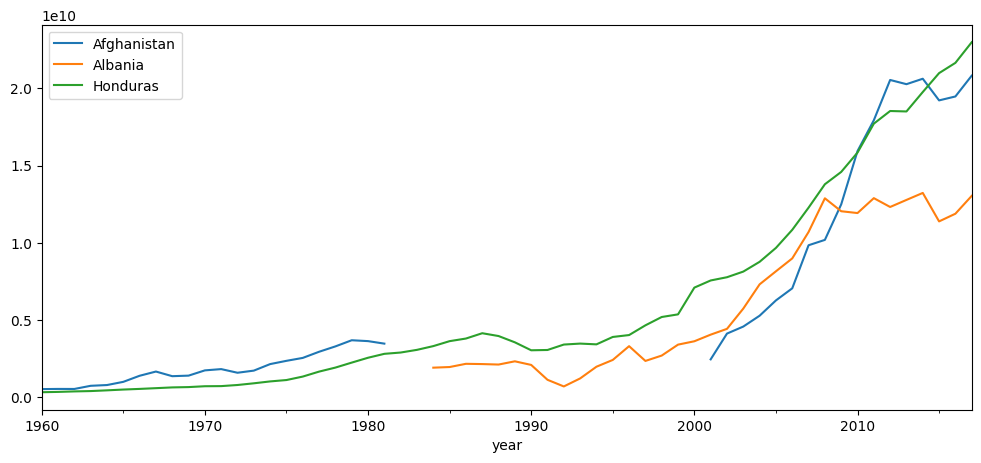

In [58]:
# Importing the library which will be used for plotting the graph
import matplotlib.pyplot as plt
%matplotlib inline 

# put the data set into long form instead of wide
df_melt = pd.melt(df_gdp, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='year', value_name='GDP')

# convert year to a date time
df_melt['year'] = pd.to_datetime(df_melt['year'])

def plot_results(column_name):
    # plot the results for Afghanistan, Albania, and Honduras
    fig, ax = plt.subplots(figsize=(12,5))

    df_melt[(df_melt['Country Name'] == 'Afghanistan') | 
            (df_melt['Country Name'] == 'Albania') | 
            (df_melt['Country Name'] == 'Honduras')].groupby('Country Name').plot('year', column_name, legend=True, ax=ax)
    ax.legend(labels=['Afghanistan', 'Albania', 'Honduras'])
    
plot_results('GDP')

Afghanistan and Albania are missing data, which show up as gaps in the results.

Let's fill the missing values using the __mean__ of the values.

In case you're wondering how a melt() function works, refer the image below to have a complete understanding - 
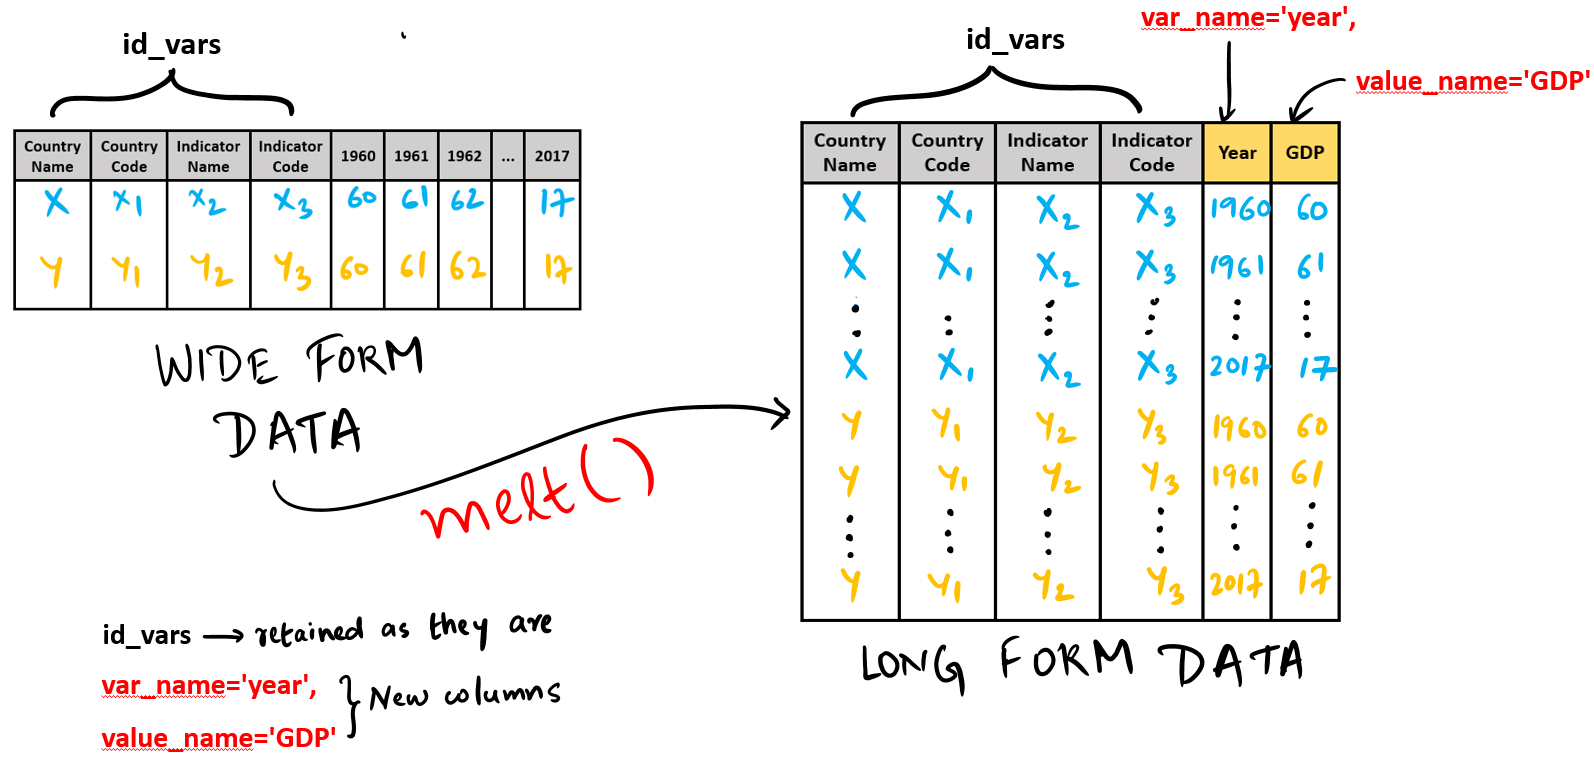

In [59]:
# TODO: Use the df_melt dataframe and fill in missing values with a country's mean GDP
# Put the results in a new column called 'GDP_filled'.

# HINT: You can do this with these methods: groupby(), transform(), a lambda function, fillna(), and mean()

df_melt['GDP_filled'] = df_melt.groupby('Country Name')['GDP'].transform(lambda x: x.fillna(x.mean()))

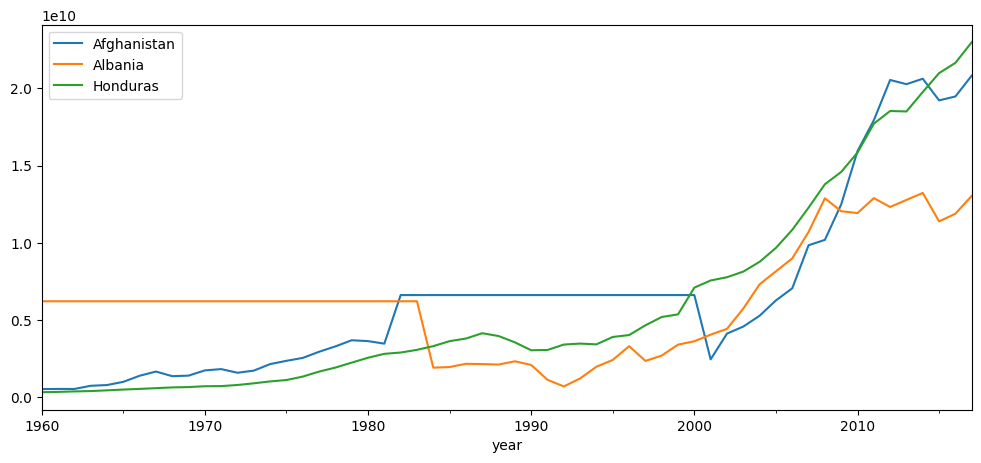

In [60]:
# Plot the results
plot_results('GDP_filled')

This is somewhat of an improvement. At least there is no missing data; however, because GDP tends to increase over time, the mean GDP is probably not the best way to fill in missing values for this particular case. 

Next, let's try using __forward fill__ to deal with any missing values.
There are two issues with this approach of filling missing values - 
- We want to first make sure the data is sorted by year
- We need to group the data by country name so that the forward fill stays within each country

In [61]:
#Imputing the forward values in the missing values

df_melt['GDP_ffill'] = df_melt.sort_values('year').groupby('Country Name')['GDP'].ffill()

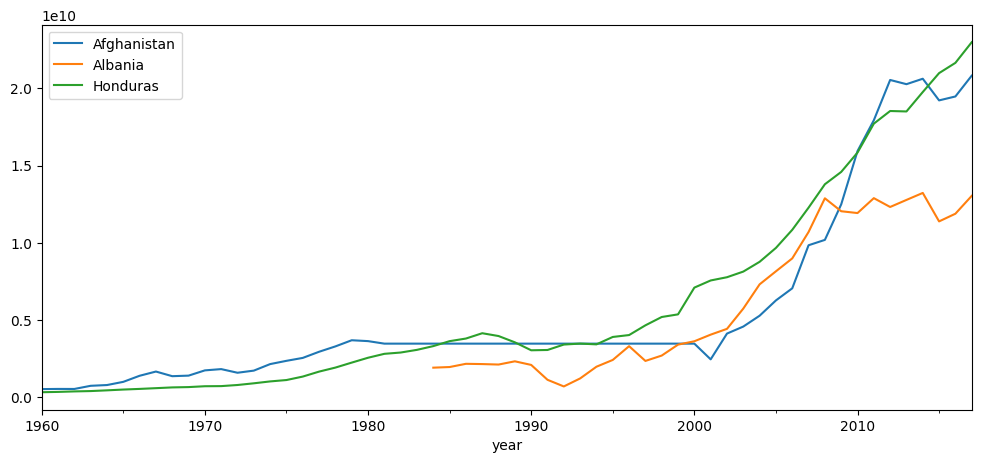

In [62]:
# plot the results

plot_results('GDP_ffill')

This looks better at least for the Afghanistan data; however, the Albania data is still missing values. We can fill in the Albania data using __back fill__.

In [63]:
#Imputing the backward values in the missing values

df_melt['GDP_bfill'] = df_melt.sort_values('year').groupby('Country Name')['GDP'].bfill()

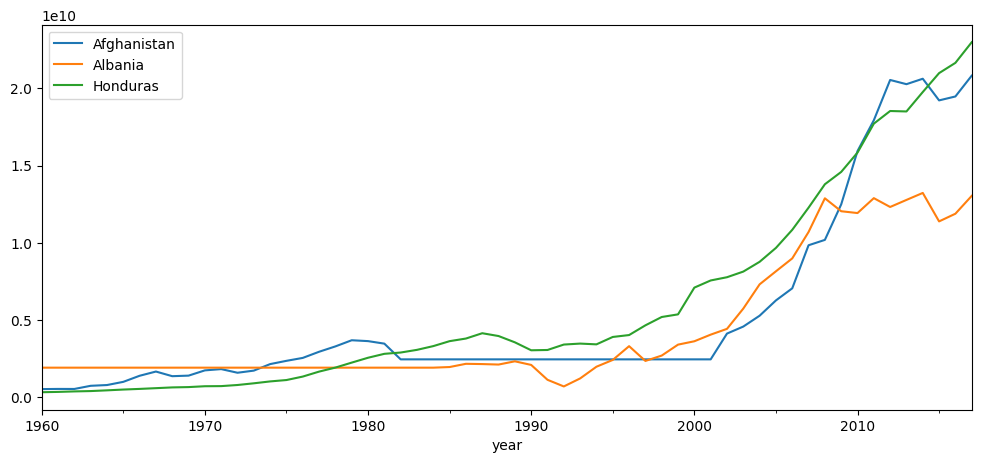

In [64]:
# plot the results

plot_results('GDP_bfill')

In this case, the GDP data for all three countries is now complete. Note that forward fill did not fill all the Albania data because the first data entry in 1960 was NaN. Forward fill would try to fill the 1961 value with the NaN value from 1960.

To completely fill the entire GDP data for all countries, we might have to run both forward fill and back fill. 

Note as well that the results will be slightly different depending on if we run forward fill first or back fill first. Afghanistan, for example, is missing data in the middle of the data set. Hence forward fill and back fill will have slightly different results.

Let's see if running both forward fill and back fill end up filling all the GDP NaN values.

In [65]:
# Run forward fill and backward fill on the GDP data
df_melt['GDP_ff_bf'] = df_melt.sort_values('year').groupby('Country Name')['GDP'].ffill().bfill()

# Check if any GDP values are null
df_melt['GDP_ff_bf'].isnull().sum()

0

### 3.5 Duplicate values
There might some duplicate values present in the dataset. We can use the __drop_duplicates ()__ method to remove duplicates.

There are multiple parameters which can be passed in this function to handle duplicate values in the dataset, some of them are :
- __drop_duplicates ()__ - for dropping entire rows
- __drop_duplicates (keep = 'last')__ - for keeping the last duplicate row
- __drop_duplicates (keep = 'False')__ - for not keeping any duplicate rows
- __drop_duplicates (subset = 'column_name')__ - for dropping duplicate rows as per a column
- __drop_duplicates (subset = ['column1_name', 'column2_name'])__ - for dropping duplicate rows as per multiple columns
- etc......

__NOTE__ - The usage of these techniques totally depends on the requirements, nature of data, amount of missing values and other factors as well. 

Also, we can use "inplace = True" if we want the changes to happen in the same dataframe only.

In [66]:
# First let's import the dataset

df_gdp = pd.read_csv('C:/Users/Admin/Downloads/ETL Project/kaggle/input/gdp_data.csv', skiprows=4)
df_gdp.drop('Unnamed: 62', axis=1, inplace=True) #removing the column which has only NULL values 

In [67]:
df_gdp

Country Name Country Code     Indicator Name  Indicator Code  \
0           Aruba          ABW  GDP (current US$)  NY.GDP.MKTP.CD   
1     Afghanistan          AFG  GDP (current US$)  NY.GDP.MKTP.CD   
2          Angola          AGO  GDP (current US$)  NY.GDP.MKTP.CD   
3         Albania          ALB  GDP (current US$)  NY.GDP.MKTP.CD   
4         Andorra          AND  GDP (current US$)  NY.GDP.MKTP.CD   
..            ...          ...                ...             ...   
259        Kosovo          XKX  GDP (current US$)  NY.GDP.MKTP.CD   
260   Yemen, Rep.          YEM  GDP (current US$)  NY.GDP.MKTP.CD   
261  South Africa          ZAF  GDP (current US$)  NY.GDP.MKTP.CD   
262        Zambia          ZMB  GDP (current US$)  NY.GDP.MKTP.CD   
263      Zimbabwe          ZWE  GDP (current US$)  NY.GDP.MKTP.CD   

             1960          1961          1962          1963          1964  \
0             NaN           NaN           NaN           NaN           NaN   
1    5.377778e+08  5.488889e+08  5.466667e+08  7.511112e+08  8.000000e+08   
2             NaN           NaN           NaN           NaN           NaN   
3             NaN           NaN           NaN           NaN           NaN   
4             NaN           NaN           NaN           NaN           NaN   
..            ...           ...           ...           ...           ...   
259           NaN           NaN           NaN           NaN           NaN   
260           NaN           NaN           NaN           NaN           NaN   
261  7.575248e+09  7.972841e+09  8.497830e+09  9.423212e+09  1.037379e+10   
262  7.130000e+08  6.962857e+08  6.931429e+08  7.187143e+08  8.394286e+08   
263  1.052990e+09  1.096647e+09  1.117602e+09  1.159512e+09  1.217138e+09   

             1965  ...          2008          2009          2010  \
0             NaN  ...  2.791961e+09  2.498933e+09  2.467704e+09   
1    1.006667e+09  ...  1.019053e+10  1.248694e+10  1.593680e+10   
2             NaN  ...  8.417804e+10  7.549239e+10  8.252614e+10   
3             NaN  ...  1.288135e+10  1.204421e+10  1.192695e+10   
4             NaN  ...  4.007353e+09  3.660531e+09  3.355695e+09   
..            ...  ...           ...           ...           ...   
259           NaN  ...  5.687488e+09  5.653793e+09  5.829934e+09   
260           NaN  ...  2.691085e+10  2.513027e+10  3.090675e+10   
261  1.133417e+10  ...  2.871000e+11  2.972167e+11  3.752981e+11   
262  1.082857e+09  ...  1.791086e+10  1.532834e+10  2.026556e+10   
263  1.311436e+09  ...  4.415703e+09  8.621574e+09  1.014186e+10   

             2011          2012          2013          2014          2015  \
0    2.584464e+09           NaN           NaN           NaN           NaN   
1    1.793024e+10  2.053654e+10  2.026425e+10  2.061610e+10  1.921556e+10   
2    1.041158e+11  1.139232e+11  1.249125e+11  1.267302e+11  1.026212e+11   
3    1.289087e+10  1.231978e+10  1.277628e+10  1.322824e+10  1.138693e+10   
4    3.442063e+09  3.164615e+09  3.281585e+09  3.350736e+09  2.811489e+09   
..            ...           ...           ...           ...           ...   
259  6.686683e+09  6.500193e+09  7.073420e+09  7.386891e+09  6.439947e+09   
260  3.272642e+10  3.540133e+10  4.041524e+10  4.322858e+10  3.460248e+10   
261  4.168782e+11  3.963327e+11  3.668294e+11  3.509046e+11  3.177410e+11   
262  2.346010e+10  2.550337e+10  2.804546e+10  2.715063e+10  2.115439e+10   
263  1.209845e+10  1.424249e+10  1.545177e+10  1.589105e+10  1.630467e+10   

             2016          2017  
0             NaN           NaN  
1    1.946902e+10  2.081530e+10  
2    9.533720e+10  1.242094e+11  
3    1.188368e+10  1.303935e+10  
4    2.877312e+09  3.012914e+09  
..            ...           ...  
259  6.715487e+09  7.128691e+09  
260  1.821333e+10           NaN  
261  2.957627e+11  3.494193e+11  
262  2.095475e+10  2.580867e+10  
263  1.661996e+10  1.784582e+10  

[264 rows x 62 columns]

In [68]:
# Since this dataset has no duplicate rows, we will just try to remove the duplicate rows as per a column

# Removing duplicate rows as per the column named "Indicator Name" 
# (We should get only 1 row and rest of the rows should be removed as all the values in this column are "GDP (current US$)" only)

df_gdp.drop_duplicates(subset = 'Indicator Name')

Country Name Country Code     Indicator Name  Indicator Code  1960  1961  \
0        Aruba          ABW  GDP (current US$)  NY.GDP.MKTP.CD   NaN   NaN   

   1962  1963  1964  1965  ...          2008          2009          2010  \
0   NaN   NaN   NaN   NaN  ...  2.791961e+09  2.498933e+09  2.467704e+09   

           2011  2012  2013  2014  2015  2016  2017  
0  2.584464e+09   NaN   NaN   NaN   NaN   NaN   NaN  

[1 rows x 62 columns]

### 3.6 Dummy variables
A computer does not understand text, it only understands numbers (that too binary numbers only). In a dataset, we can have two types of columns -
- __categorical__ - any column having text values
- __numerical__ - any column having numbers

For numerical columns - a computer can easily read it by converting it into binary format.
<br>For categorical columns - it cannot do so, and hence there is a need to convert the text values into binary format - these converted variables are called as __dummy variables__.

Refer the image below for clear understanding - 
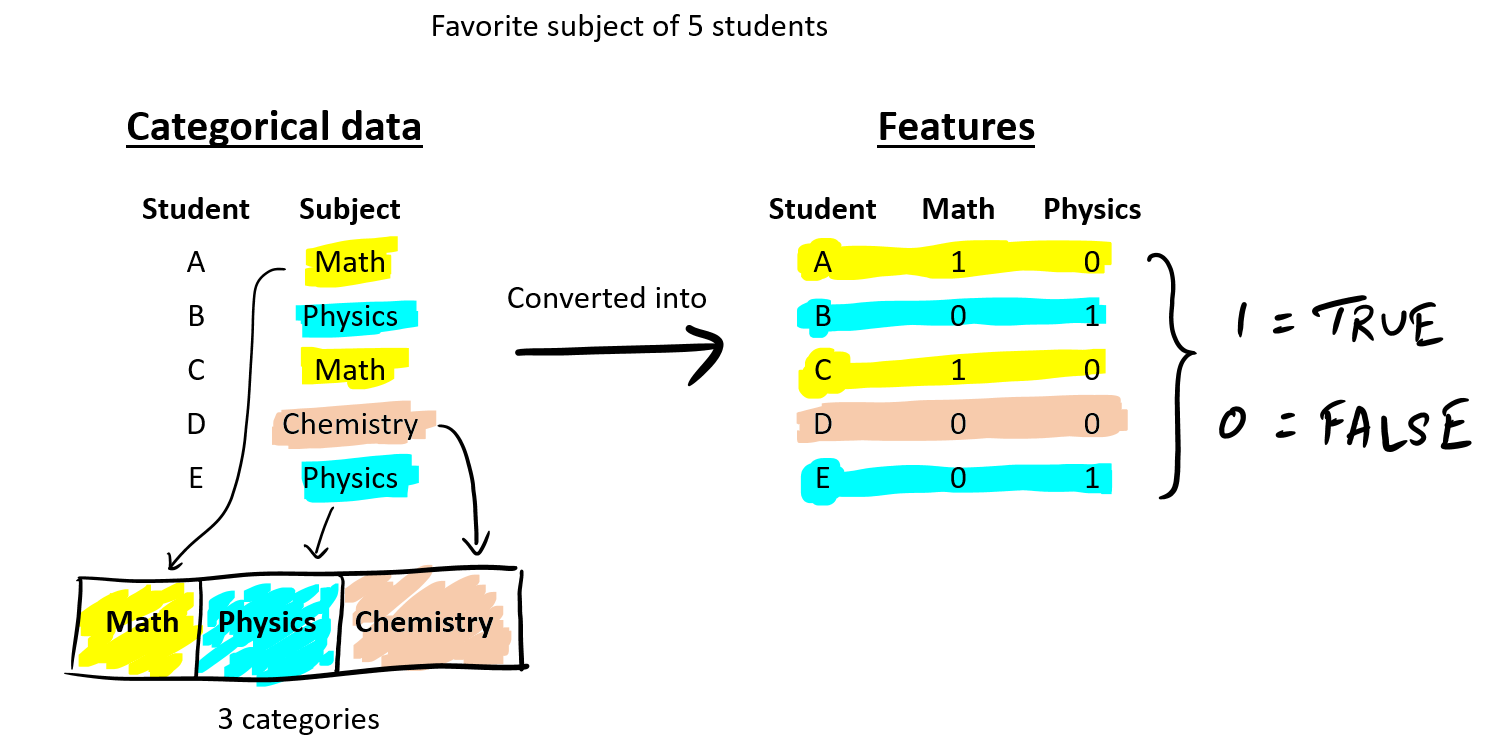

__NOTE__ - Here if the total no. of categories are "__n__', then the no. of features will be "__n-1__".

Pandas makes it very easy to create dummy variables with the __get_dummies ()__ method. Now, we'll create dummy variables from the World Bank projects data; however, there's a caveat. The World Bank data is not particularly clean, so we'll need to explore and wrangle the data first.

We'll focus on the text values in the sector variables.

In [69]:
#Let's first import, drop unnecessary column and do some data type conversions.

projects = pd.read_csv('C:/Users/Admin/Downloads/ETL Project/kaggle/input/projects_data.csv', dtype=str)
projects.drop('Unnamed: 56', axis=1, inplace=True)
projects['totalamt'] = pd.to_numeric(projects['totalamt'].str.replace(',', ''))
projects['countryname'] = projects['countryname'].str.split(';', expand=True)[0]
projects['boardapprovaldate'] = pd.to_datetime(projects['boardapprovaldate'])

# keep the project name, lending, sector and theme data
sector = projects.copy() #creating a copy of the projects dataframe
sector = sector[['project_name', 'lendinginstr', 'sector1', 'sector2', 'sector3', 'sector4', 'sector5', 'sector',
          'mjsector1', 'mjsector2', 'mjsector3', 'mjsector4', 'mjsector5',
          'mjsector', 'theme1', 'theme2', 'theme3', 'theme4', 'theme5', 'theme ',
          'goal', 'financier', 'mjtheme1name', 'mjtheme2name', 'mjtheme3name',
          'mjtheme4name', 'mjtheme5name']]

In [70]:
# Let's check the percentage of each variable that is null.

100 * sector.isnull().sum()/sector.shape[0]

project_name      0.000000
lendinginstr      1.348093
sector1           0.000000
sector2          47.791539
sector3          64.450899
sector4          76.019290
sector5          85.132617
sector            3.496274
mjsector1       100.000000
mjsector2       100.000000
mjsector3       100.000000
mjsector4       100.000000
mjsector5       100.000000
mjsector          3.496274
theme1            0.000000
theme2           46.005042
theme3           58.987286
theme4           71.317405
theme5           83.954406
theme           100.000000
goal             33.510522
financier        61.310829
mjtheme1name    100.000000
mjtheme2name    100.000000
mjtheme3name    100.000000
mjtheme4name    100.000000
mjtheme5name    100.000000
dtype: float64

Notice the mjsector1 through mjsector5 variables are all null. The mjtheme1name through mjtheme5name are also all null as well as the theme variable.
Because these variables contain so many null values, they're probably not very useful.

The __sector1__ variable looks promising; it doesn't contain any null values at all.

Let's store the unique sector1 values in a list and output the results.

In [71]:
# Create a list of the unique values in sector1. Use the sort_values() and unique() pandas methods. 
# And then convert those results into a Python list

uniquesectors1 = sector['sector1'].sort_values().unique()
uniquesectors1

array(['!$!0', '(Historic)Agency reform!$!50!$!AG',
       '(Historic)Agricultural credit!$!100!$!AC', ...,
       'Workforce Development and Vocational Education!$!96!$!EW',
       'Workforce Development and Vocational Education!$!98!$!EW',
       'Workforce Development and Vocational Education!$!99!$!EW'],
      dtype=object)

In [72]:
# Checking the number of unique values

print('Number of unique values in sector1:', len(uniquesectors1))

Number of unique values in sector1: 3060


In [73]:
# Looking at the values in this list

print(list(uniquesectors1))

['!$!0', '(Historic)Agency reform!$!50!$!AG', '(Historic)Agricultural credit!$!100!$!AC', '(Historic)Agricultural extension!$!100!$!AE', '(Historic)Agriculture adjustment!$!100!$!AA', '(Historic)Agriculture adjustment!$!60!$!AA', '(Historic)Agro-industry and marketing!$!100!$!AM', '(Historic)Agro-industry!$!100!$!AN', '(Historic)Annual crops!$!100!$!AQ', '(Historic)Basic health!$!100!$!HB', '(Historic)Business environment!$!100!$!DB', '(Historic)Civil service reform!$!100!$!BA', '(Historic)Civil service reform!$!50!$!BA', '(Historic)Decentralization!$!100!$!BD', '(Historic)Distribution and transmission!$!100!$!PD', '(Historic)Economic management!$!100!$!ME', '(Historic)Economic management!$!40!$!ME', '(Historic)Education adjustment!$!100!$!EE', '(Historic)Electric power and other energy adjustment!$!100!$!PP', '(Historic)Environment adjustment!$!100!$!VV', '(Historic)Environmental institutions!$!100!$!VI', '(Historic)Fertilizer and other chemicals!$!100!$!IC', '(Historic)Financial adju

There are a few issues with this 'sector1' variable -
- __Issue 1:__ - There are values labeled '!$!0' - these should be substituted with NaN

- __Issue 2:__ -
  <br>a) Each sector1 value ends with a ten or eleven character string like '! !49!!EP'
  <br>b) Some sectors show up twice in the list like: 'Other Industry; Trade and Services! !70!!YZ', 'Other Industry; Trade and Services! !63!!YZ'
<br><br>But it seems like those are actually the same sector. We'll need to remove everything past the exclamation point.

- __Issue 3:__ - Many values in the sector1 variable start with the term '(Historic)'. We have to remove that phrase as well.

In order to solve these 3 errors, we'll need to understand two concepts - 
- __replace ()__ - We can use the replace() method to search for text and replace parts of a string with another string.

  For example, say we wanted to remove the string '(Trial)' from this data -
  <br>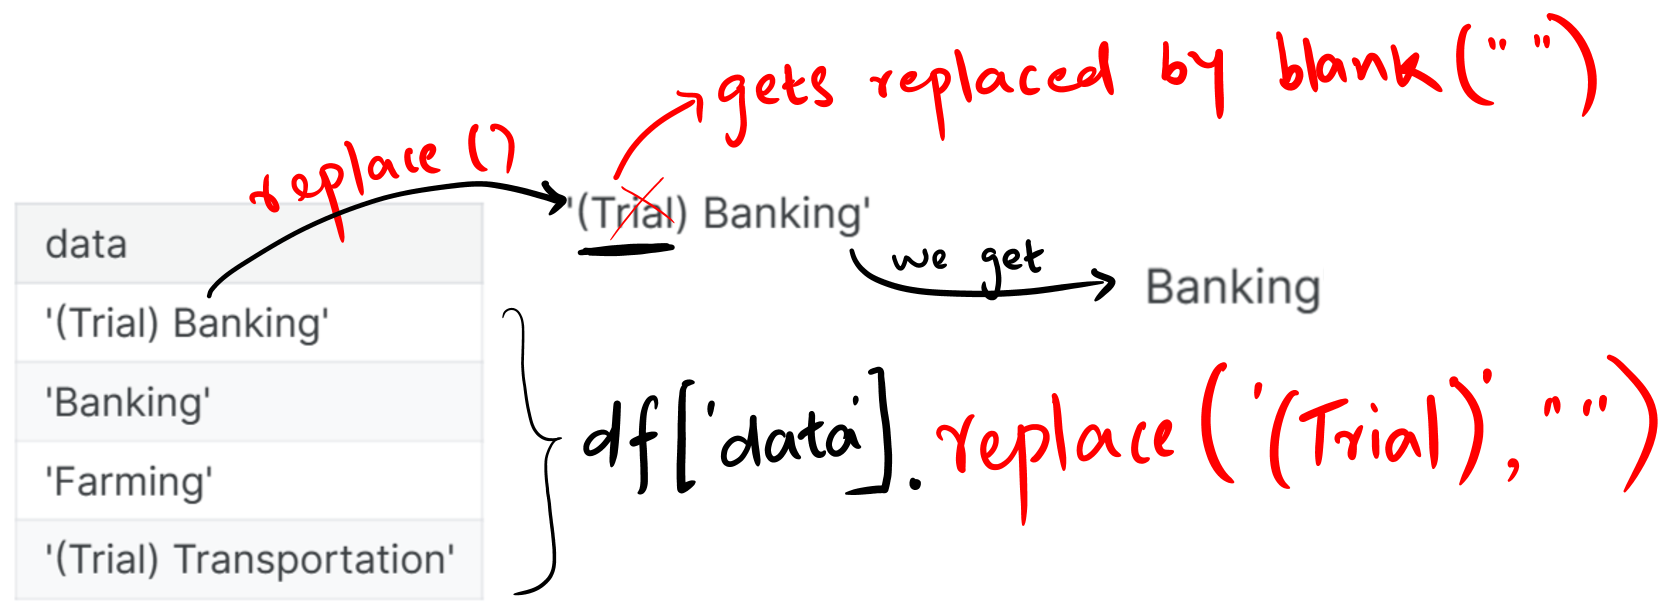

- __regex__ - We can use it when we want to find a string that has a pattern and has an unknown number of characters in it.

  For example, say we wanted to remove the string which comes after the "?" from this data -
  <br>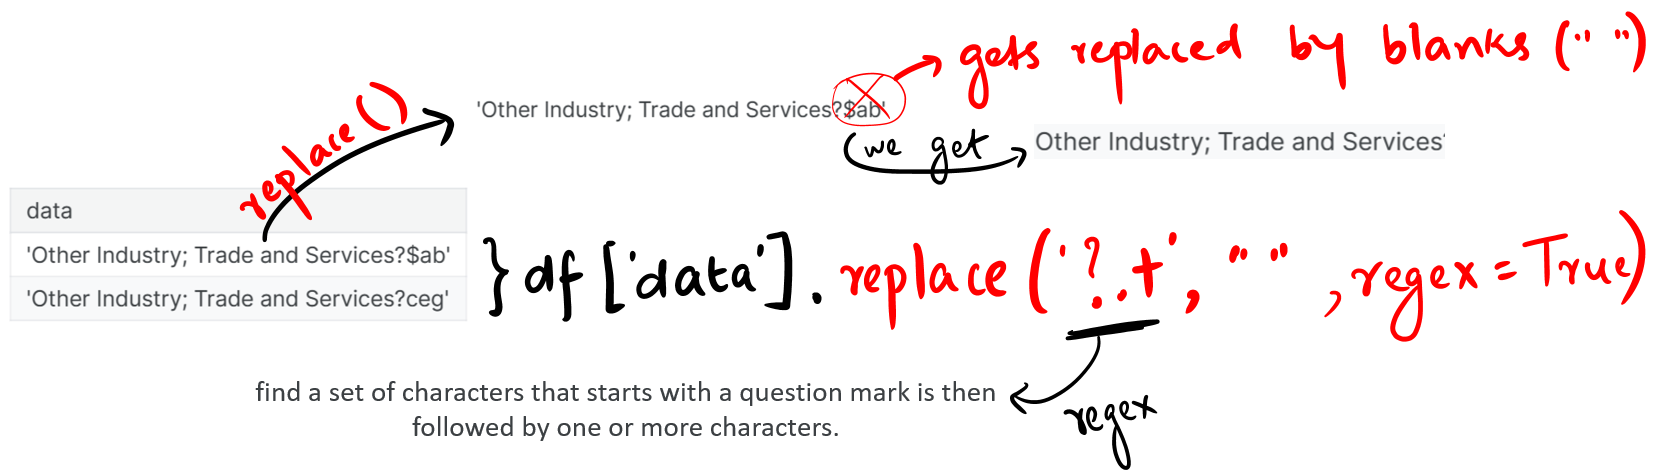

Let's apply these concepts on our data.

In [74]:
# In the sector1 variable, replace the string '!$10' with nan
sector['sector1'] = sector['sector1'].replace('!$!0', np.nan)


# In the sector1 variable, remove the last 10 or 11 characters from the sector1 variable using regex.
# We can use a regex expression '!.+' which looks for a string with an exclamation point followed by one or more characters
sector['sector1'] = sector['sector1'].replace('!.+', '', regex=True)

# Remove the string '(Historic)' from the sector1 variable
# We can use the replace method
sector['sector1'] = sector['sector1'].replace('^(Historic)', '', regex = True)

print('Number of unique sectors after cleaning:', len(list(sector['sector1'].unique())))
print('Percentage of null values after cleaning:', 100 * sector['sector1'].isnull().sum() / sector['sector1'].shape[0])

Number of unique sectors after cleaning: 159
Percentage of null values after cleaning: 3.4962735642262164


##### <br>Now there are 156 unique categorical values. That's better than 3060.

Now let's use the pandas __pd.get_dummies()__ method to create dummy variables. Then use the concat() method to concatenate the dummy variables to a dataframe that contains the project totalamt variable and the project year from the boardapprovaldate.

In [75]:
dummies = pd.DataFrame(pd.get_dummies(sector['sector1']))

#  Filter the projects data for the totalamt, the year from boardapprovaldate, and the dummy variables
projects['year'] = projects['boardapprovaldate'].dt.year
df = projects[['totalamt','year']]
df_final = pd.concat([df, dummies], axis=1)

df_final.head()

totalamt    year  (Historic)Agency reform  (Historic)Agricultural credit  \
0          0  2018.0                    False                          False   
1  200000000  2018.0                    False                          False   
2   58330000  2018.0                    False                          False   
3   20000000  2018.0                    False                          False   
4  100000000  2018.0                    False                          False   

   (Historic)Agricultural extension  (Historic)Agriculture adjustment  \
0                             False                             False   
1                             False                             False   
2                             False                             False   
3                             False                             False   
4                             False                             False   

   (Historic)Agro-industry  (Historic)Agro-industry and marketing  \
0                    False                                  False   
1                    False                                  False   
2                    False                                  False   
3                    False                                  False   
4                    False                                  False   

   (Historic)Annual crops  (Historic)Basic health  ...  \
0                   False                   False  ...   
1                   False                   False  ...   
2                   False                   False  ...   
3                   False                   False  ...   
4                   False                   False  ...   

   Sub-National Government  Telecommunications  Tertiary Education  Tourism  \
0                    False               False               False    False   
1                    False               False               False    False   
2                    False               False               False    False   
3                    False               False               False    False   
4                    False               False               False    False   

   Trade  Urban Transport  Vocational training  Waste Management  \
0  False            False                False             False   
1  False            False                False             False   
2  False            False                False             False   
3  False            False                False             False   
4  False            False                False             False   

   Water Supply  Workforce Development and Vocational Education  
0         False                                           False  
1         False                                           False  
2         False                                           False  
3         False                                           False  
4         False                                           False  

[5 rows x 160 columns]

And that's it! That's how we create dummy variables - now we can use this data to apply a machine learning algorithm (when needed).

### 3.7 Finding Outliers
A dataset can have a number of columns in it and each column has a series of values. Now, these values fall in some range (between min and max values).
<br> An __outlier__ is a data point that is significantly different from other data points in a dataset. These are values that stand out as unusual or unexpected compared to the majority of the data.

Let's practice looking for outliers. We'll look at the World Bank GDP and population data sets. 
<br>First, we'll look at the data from a one-dimensional perspective and then a two-dimensional perspective.

In [76]:
# read in the projects data set and do basic wrangling 
gdp = pd.read_csv('C:/Users/Admin/Downloads/ETL Project/kaggle/input/gdp_data.csv', skiprows=4)
gdp.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
population = pd.read_csv('C:/Users/Admin/Downloads/ETL Project/kaggle/input/population_data.csv', skiprows=4)
population.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)


# Reshape the data sets so that they are in long format
gdp_melt = gdp.melt(id_vars=['Country Name'], 
                    var_name='year', 
                    value_name='gdp')

# Use back fill and forward fill to fill in missing gdp values
gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby('Country Name')['gdp'].ffill().bfill()

population_melt = population.melt(id_vars=['Country Name'], 
                                  var_name='year', 
                                  value_name='population')

# Use back fill and forward fill to fill in missing population values
population_melt['population'] = population_melt.sort_values('year').groupby('Country Name')['population'].ffill().bfill()

# merge the population and gdp data together into one data frame
df_country = gdp_melt.merge(population_melt, on=('Country Name', 'year'))

# filter data for the year 2016
df_2016 = df_country[df_country['year'] == '2016']

# see what the data looks like
df_2016.head(10)

Country Name  year           gdp   population
14784                 Aruba  2016  2.584464e+09     104822.0
14785           Afghanistan  2016  1.946902e+10   34656032.0
14786                Angola  2016  9.533720e+10   28813463.0
14787               Albania  2016  1.188368e+10    2876101.0
14788               Andorra  2016  2.877312e+09      77281.0
14789            Arab World  2016  2.500164e+12  406452690.0
14790  United Arab Emirates  2016  3.570451e+11    9269612.0
14791             Argentina  2016  5.548609e+11   43847430.0
14792               Armenia  2016  1.054614e+10    2924816.0
14793        American Samoa  2016  6.580000e+08      55599.0

<Axes: >

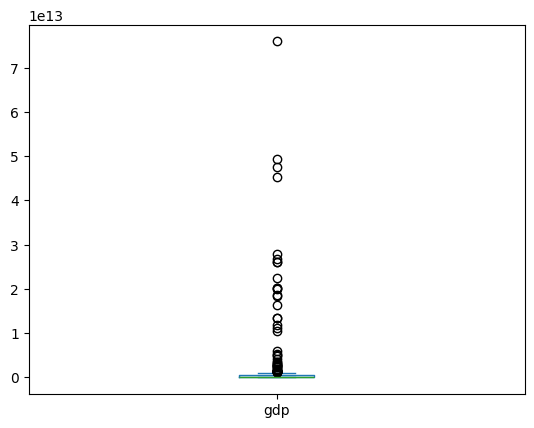

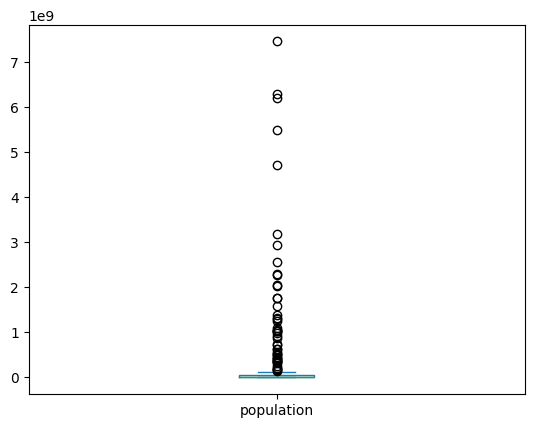

In [77]:
# Explore the data set to identify outliers using the Tukey rule.

import matplotlib.pyplot as plt
%matplotlib inline 

# Make a boxplot of the population data for the year 2016
df_2016.plot('population',kind='box')

# Make a boxplot of the gdp data for the year 2016
df_2016.plot('gdp',kind='box')

Use the __Tukey rule__ to determine what values of the population data are outliers for the year 2016. The Tukey rule finds outliers in one-dimension. 

The steps are:
- Find the first quartile (ie .25 quantile)
- Find the third quartile (ie .75 quantile)
- Calculate the inter-quartile range (Q3 - Q1)
- Any value that is greater than Q3 + 1.5 * IQR is an outlier
- Any value that is less than Q1 - 1.5 * IQR is an outlier

Let's first start with __One-dimensional analysis__.

In [78]:
#Finding outliers

population_2016 = df_2016[['Country Name','population']]

# Calculate the first quartile of the population values for 2016
# We can use the pandas quantile method 
Q1 = population_2016['population'].quantile(0.25)

# Calculate the third quartile of the population values for 2016
Q3 = population_2016['population'].quantile(0.75)

# Calculate the interquartile range Q3 - Q1
IQR = Q3 - Q1

# Calculate the maximum value and minimum values according to the Tukey rule
# max_value is Q3 + 1.5 * IQR while min_value is Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# filter the population_2016 data for population values that are greater than max_value or less than min_value
population_outliers = population_2016[(population_2016['population'] > max_value) | (population_2016['population'] < min_value)]
population_outliers

Country Name    population
14789                                         Arab World  4.064527e+08
14802                                         Bangladesh  1.629516e+08
14811                                             Brazil  2.076529e+08
14822                                              China  1.378665e+09
14843        East Asia & Pacific (excluding high income)  2.053299e+09
14844                         Early-demographic dividend  3.170658e+09
14845                                East Asia & Pacific  2.298727e+09
14846      Europe & Central Asia (excluding high income)  4.132349e+08
14847                              Europe & Central Asia  9.116863e+08
14850                                          Euro area  3.406174e+08
14855                                     European Union  5.112190e+08
14856           Fragile and conflict affected situations  4.995085e+08
14877                                        High income  1.242138e+09
14880             Heavily indebted poor countries (HIPC)  7.446030e+08
14884                                          IBRD only  4.699232e+09
14885                                   IDA & IBRD total  6.273585e+09
14886                                          IDA total  1.574353e+09
14887                                          IDA blend  5.211590e+08
14888                                          Indonesia  2.611155e+08
14889                                           IDA only  1.053194e+09
14891                                              India  1.324171e+09
14910  Latin America & Caribbean (excluding high income)  5.622548e+08
14916                          Latin America & Caribbean  6.376639e+08
14917       Least developed countries: UN classification  9.793879e+08
14918                                         Low income  7.140223e+08
14921                                Lower middle income  2.931076e+09
14922                                Low & middle income  6.202020e+09
14924                          Late-demographic dividend  2.264569e+09
14935                         Middle East & North Africa  4.367380e+08
14938                                      Middle income  5.487997e+09
14943  Middle East & North Africa (excluding high inc...  3.737191e+08
14952                                      North America  3.597359e+08
14956                                            Nigeria  1.859896e+08
14963                                       OECD members  1.289987e+09
14966                                           Pakistan  1.932035e+08
14973                           Pre-demographic dividend  8.792925e+08
14980                          Post-demographic dividend  1.102779e+09
14984                                 Russian Federation  1.443424e+08
14986                                         South Asia  1.766394e+09
14997         Sub-Saharan Africa (excluding high income)  1.033118e+09
14999                                 Sub-Saharan Africa  1.033213e+09
15012         East Asia & Pacific (IDA & IBRD countries)  2.027896e+09
15013       Europe & Central Asia (IDA & IBRD countries)  4.553794e+08
15018  Latin America & the Caribbean (IDA & IBRD coun...  6.215349e+08
15020  Middle East & North Africa (IDA & IBRD countries)  3.691675e+08
15022                            South Asia (IDA & IBRD)  1.766394e+09
15023          Sub-Saharan Africa (IDA & IBRD countries)  1.033213e+09
15031                                Upper middle income  2.556922e+09
15033                                      United States  3.234059e+08
15041                                              World  7.444157e+09

Clearly many of these outliers are due to regional data getting aggregated together.

Remove these data points and redo the analysis. There's a list provided below of the 'Country Name' values that are not actually countries.

In [79]:
# remove the rows from the data that have Country Name values in the non_countries list
# Store the filter results back into the df_2016 variable

non_countries = ['World',
 'High income',
 'OECD members',
 'Post-demographic dividend',
 'IDA & IBRD total',
 'Low & middle income',
 'Middle income',
 'IBRD only',
 'East Asia & Pacific',
 'Europe & Central Asia',
 'North America',
 'Upper middle income',
 'Late-demographic dividend',
 'European Union',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Euro area',
 'Early-demographic dividend',
 'Lower middle income',
 'Latin America & Caribbean',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Latin America & Caribbean (excluding high income)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Middle East & North Africa',
 'Europe & Central Asia (excluding high income)',
 'South Asia (IDA & IBRD)',
 'South Asia',
 'Arab World',
 'IDA total',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (IDA & IBRD countries)',
 'Sub-Saharan Africa (excluding high income)',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Central Europe and the Baltics',
 'Pre-demographic dividend',
 'IDA only',
 'Least developed countries: UN classification',
 'IDA blend',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'Low income',
 'Small states',
 'Other small states',
 'Not classified',
 'Caribbean small states',
 'Pacific island small states']

# remove non countries from the data
df_2016 = df_2016[~df_2016['Country Name'].isin(non_countries)]

In [80]:
# Re-rerun the Tukey code with this filtered data to find population outliers

# Filter the data for the year 2016 and put the results in the population_2016 variable.
# We only need to keep the Country Name and population columns
population_2016 = df_2016[['Country Name','population']]

# We can use the pandas quantile method 
Q1 = population_2016['population'].quantile(0.25)

# Calculate the third quartile of the population values for 2016
Q3 = population_2016['population'].quantile(0.75)

# Calculate the interquartile range Q3 - Q1
IQR = Q3 - Q1

# Calculate the maximum value and minimum values according to the Tukey rule
# max_value is Q3 + 1.5 * IQR while min_value is Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# filter the population_2016 data for population values that are greater than max_value or less than min_value
population_outliers = population_2016[(population_2016['population'] > max_value) | (population_2016['population'] < min_value)]
population_outliers

Country Name    population
14802          Bangladesh  1.629516e+08
14811              Brazil  2.076529e+08
14822               China  1.378665e+09
14825    Congo, Dem. Rep.  7.873615e+07
14837             Germany  8.234867e+07
14849    Egypt, Arab Rep.  9.568868e+07
14854            Ethiopia  1.024032e+08
14859              France  6.685977e+07
14863      United Kingdom  6.559556e+07
14888           Indonesia  2.611155e+08
14891               India  1.324171e+09
14894  Iran, Islamic Rep.  8.027743e+07
14898               Italy  6.062750e+07
14901               Japan  1.269945e+08
14936              Mexico  1.275404e+08
14956             Nigeria  1.859896e+08
14966            Pakistan  1.932035e+08
14969         Philippines  1.033202e+08
14984  Russian Federation  1.443424e+08
15015            Thailand  6.886351e+07
15026              Turkey  7.951243e+07
15033       United States  3.234059e+08
15039             Vietnam  9.456907e+07

In [81]:
# Now, let's do it for the gdp data

# Filter the data for the year 2016 and put the results in the population_2016 variable.
# We need to keep the Country Name and population columns
gdp_2016 = df_2016[['Country Name','gdp']]

# Calculate the first quartile of the population values
# We can use the pandas quantile method 
Q1 = gdp_2016['gdp'].quantile(0.25)

# Calculate the third quartile of the population values
Q3 = gdp_2016['gdp'].quantile(0.75)

# Calculate the interquartile range Q3 - Q1
IQR = Q3 - Q1

# Calculate the maximum value and minimum values according to the Tukey rule
# max_value is Q3 + 1.5 * IQR while min_value is Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# filter the population_2016 data for population values that are greater than max_value or less than min_value
gdp_outliers = gdp_2016[(gdp_2016['gdp'] > max_value) | (gdp_2016['gdp'] < min_value)]
gdp_outliers

Country Name           gdp
14791           Argentina  5.548609e+11
14795           Australia  1.208039e+12
14796             Austria  3.908000e+11
14799             Belgium  4.675455e+11
14811              Brazil  1.793989e+12
14817              Canada  1.535768e+12
14819         Switzerland  6.687453e+11
14822               China  1.119099e+13
14837             Germany  3.477796e+12
14852               Spain  1.237255e+12
14859              France  2.465134e+12
14863      United Kingdom  2.650850e+12
14888           Indonesia  9.322565e+11
14891               India  2.274230e+12
14894  Iran, Islamic Rep.  4.189767e+11
14898               Italy  1.859384e+12
14901               Japan  4.949273e+12
14908         Korea, Rep.  1.414804e+12
14936              Mexico  1.076912e+12
14956             Nigeria  4.046527e+11
14958         Netherlands  7.772275e+11
14972              Poland  4.714003e+11
14984  Russian Federation  1.284728e+12
14987        Saudi Arabia  6.449355e+11
15005              Sweden  5.144600e+11
15015            Thailand  4.117552e+11
15026              Turkey  8.637216e+11
15033       United States  1.862448e+13
15036       Venezuela, RB  4.823593e+11

Next, we need to determine which countries are in the population_outliers array as well as in the gdp_outliers array.

In [82]:
# Find country names that are in both the population_outliers and the gdp_outliers 
# We can use the pandas intersection() method and python set() and list() methods

list(set(population_outliers['Country Name']).intersection(gdp_outliers['Country Name']))

['China',
 'France',
 'Germany',
 'Italy',
 'Nigeria',
 'United Kingdom',
 'Iran, Islamic Rep.',
 'India',
 'Turkey',
 'United States',
 'Indonesia',
 'Japan',
 'Brazil',
 'Mexico',
 'Thailand',
 'Russian Federation']

These countries have both relatively high populations and high GDPs. That might be an indication that although these countries have high values for both gdp and population, they're not true outliers when looking at these values from a two-dimensional perspective.

Now let's find countries in population_outliers but not in the gdp_outliers.

In [83]:
# Find country names that are in the population outliers list but not the gdp outliers list
# Python's set() and list() methods should be helpful

list(set(population_outliers['Country Name']) - set(gdp_outliers['Country Name']))

['Vietnam',
 'Congo, Dem. Rep.',
 'Bangladesh',
 'Egypt, Arab Rep.',
 'Philippines',
 'Ethiopia',
 'Pakistan']

These countries are population outliers but not GDP outliers. If looking at outliers from a two-dimensional perspective, there's some indication that these countries might be outliers.

And finally let's find countries that are in the gdp_outliers array but not the population_outliers array.

In [84]:
# Find country names that are in the gdp outliers list but not the population outliers list
# Python's set() and list() methods should be helpful

list(set(gdp_outliers['Country Name']) - set(population_outliers['Country Name']))

['Saudi Arabia',
 'Belgium',
 'Venezuela, RB',
 'Poland',
 'Argentina',
 'Austria',
 'Spain',
 'Switzerland',
 'Korea, Rep.',
 'Australia',
 'Sweden',
 'Netherlands',
 'Canada']

On the other hand, these countries have high GDP but are not population outliers. That kind wraps-up one-dimensional analysis.

__2-Dimensional Analysis__
<br>Now, let's look at the data from a two-dimensional perspective.

Let's plot the GDP vs Population data including the country name of each point.

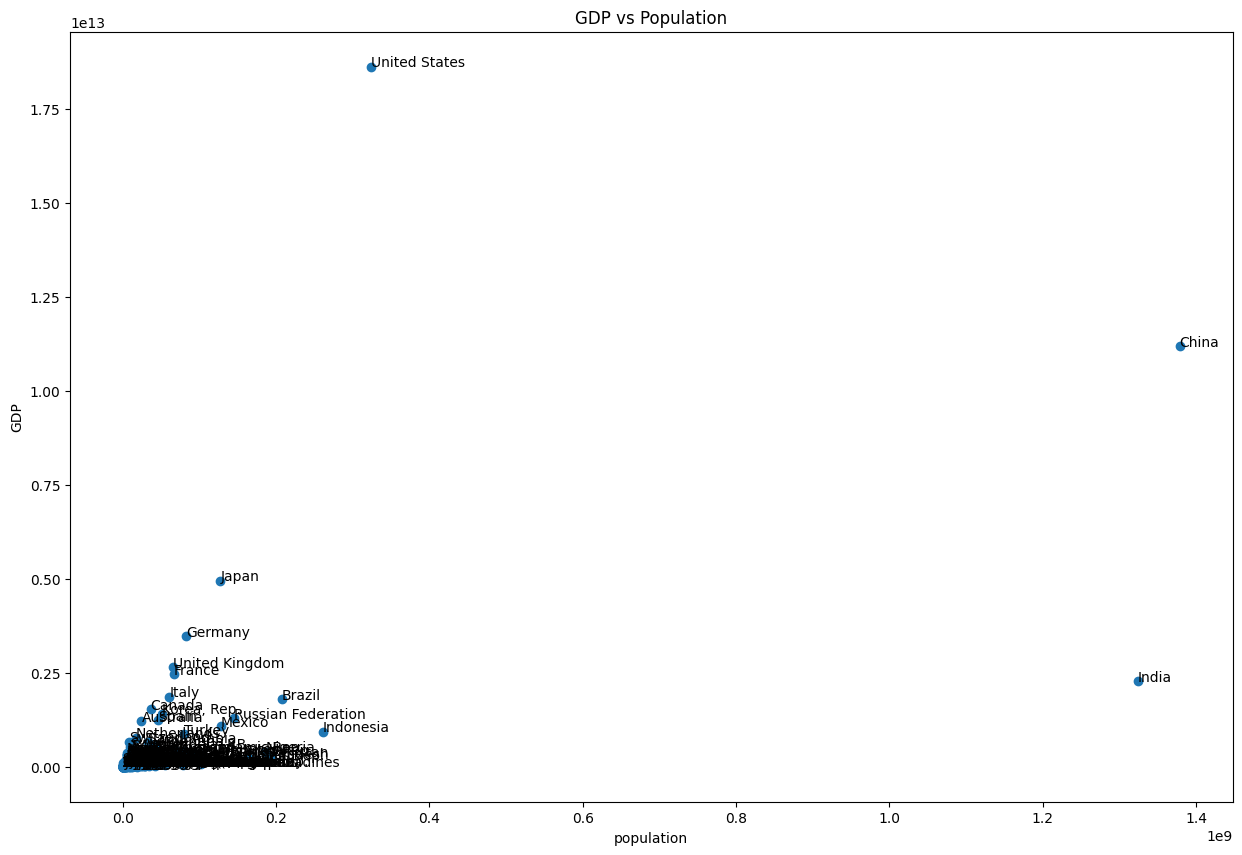

In [85]:
x = list(df_2016['population'])
y = list(df_2016['gdp'])
text = df_2016['Country Name']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)
plt.title('GDP vs Population')
plt.xlabel('population')
plt.ylabel('GDP')
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))

The United States, China, and India have such larger values that it's hard to see this data. Let's take those countries out for a moment and look at the data again.

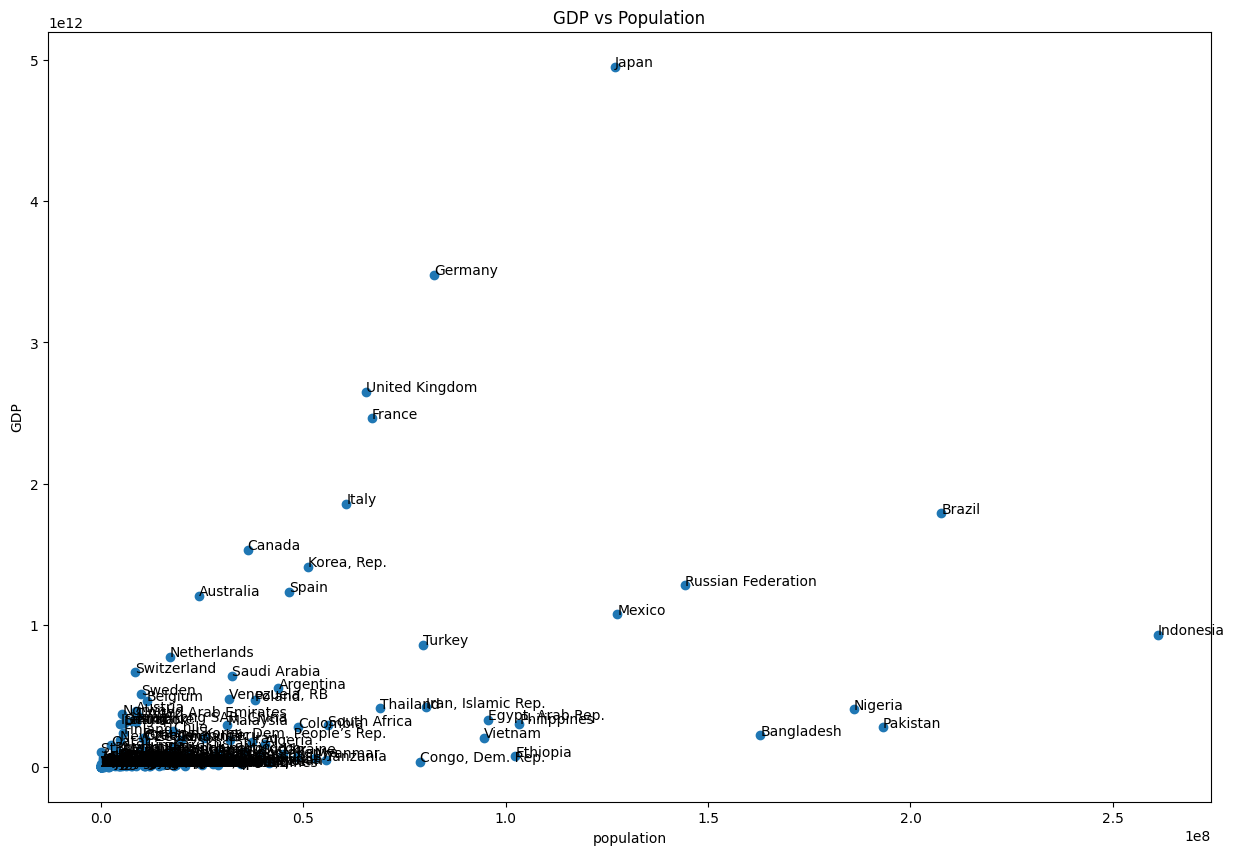

In [86]:
df_no_large = (df_2016['Country Name'] != 'United States') & (df_2016['Country Name'] != 'India') & (df_2016['Country Name'] != 'China')
x = list(df_2016[df_no_large]['population'])
y = list(df_2016[df_no_large]['gdp'])
text = df_2016[df_no_large]['Country Name']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)
plt.title('GDP vs Population')
plt.xlabel('population')
plt.ylabel('GDP')
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))

Once we have seen this plot - let's try to fit a linear regression model on the data in order to predict the GDP value for a new population value.

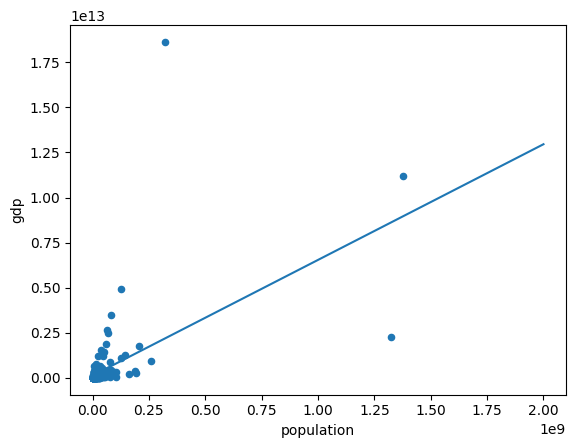

In [87]:
from sklearn.linear_model import LinearRegression

# fit a linear regression model on the population and gdp data
model = LinearRegression() #creating an instance of the model
model.fit(df_2016['population'].values.reshape(-1, 1), df_2016['gdp'].values.reshape(-1, 1)) #training the modelwith 2D arrays to find the coefficients

# plot the data along with predictions from the linear regression model
inputs = np.linspace(1, 2000000000, num=50) #generating new data points for population in order to check the accuracy of the model
predictions = model.predict(inputs.reshape(-1,1)) #getting the values of GDP as per the input given

df_2016.plot('population', 'gdp', kind='scatter') #plotting a scatter plot
plt.plot(inputs, predictions) #plotting a line graph over the scatter plot

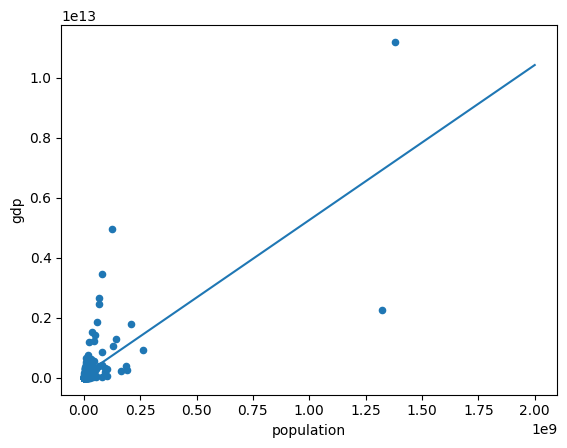

In [88]:
# Remove the United States to see what happens with the linear regression model

df_2016[df_2016['Country Name'] != 'United States'].plot('population', 'gdp', kind='scatter')
# plt.plot(inputs, predictions)
model.fit(df_2016[df_2016['Country Name'] != 'United States']['population'].values.reshape(-1, 1), 
          df_2016[df_2016['Country Name'] != 'United States']['gdp'].values.reshape(-1, 1))
inputs = np.linspace(1, 2000000000, num=50)
predictions = model.predict(inputs.reshape(-1,1))
plt.plot(inputs, predictions)

Notice that the code now ouputs a GDP value of 5.26e+12 when population equals 1e9. In other words, removing the United States shifted the linear regression line down.

### 3.8 Eliminating Outliers
Once we have found the outliers - we look at how they can be removed from our data so that accurate insights can be derived from our analysis.

We will use a very important method to remove the outliers which is called - __Tukey's rule__.
It is a statistical technique used for identifying outliers in datasets. It involves calculating the interquartile range (IQR) of the data and defining boundaries around the first and third quartiles. Data points that fall outside these boundaries are considered potential outliers.

__NOTE__ - This method can be clearly explained using a "box-plot" graph.

For more clear understanding refer the image below -
<br>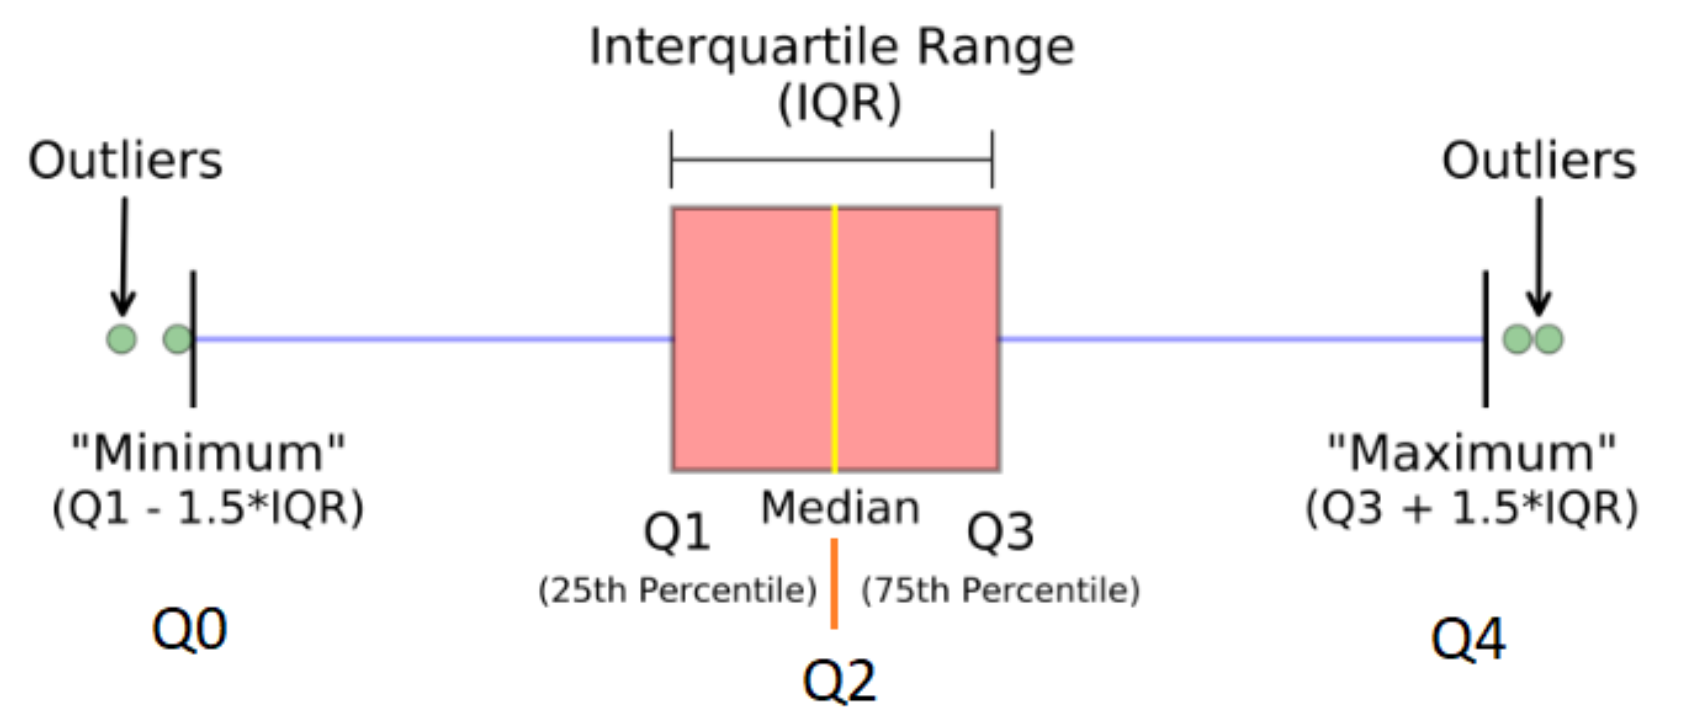

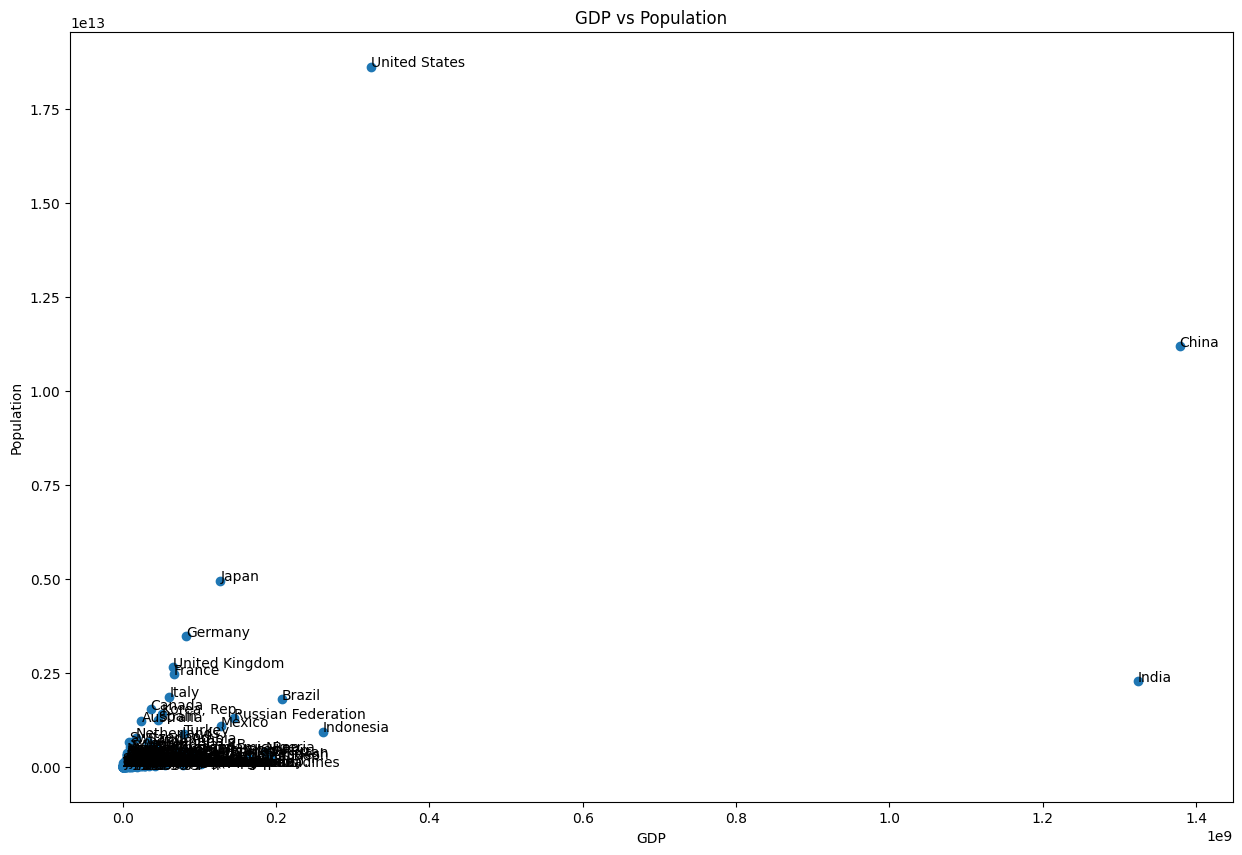

In [89]:
# read in the projects data set and do basic wrangling 

gdp = pd.read_csv('C:/Users/Admin/Downloads/ETL Project/kaggle/input/gdp_data.csv', skiprows=4)
gdp.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
population = pd.read_csv('C:/Users/Admin/Downloads/ETL Project/kaggle/input/population_data.csv', skiprows=4)
population.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)


# Reshape the data sets so that they are in long format
gdp_melt = gdp.melt(id_vars=['Country Name'], 
                    var_name='year', 
                    value_name='gdp')

# Use back fill and forward fill to fill in missing gdp values
gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby('Country Name')['gdp'].ffill().bfill()

population_melt = population.melt(id_vars=['Country Name'], 
                                  var_name='year', 
                                  value_name='population')

# Use back fill and forward fill to fill in missing population values
population_melt['population'] = population_melt.sort_values('year').groupby('Country Name')['population'].ffill().bfill()

# merge the population and gdp data together into one data frame
df_country = gdp_melt.merge(population_melt, on=('Country Name', 'year'))

# filter data for the year 2016
df_2016 = df_country[df_country['year'] == '2016']

# filter out values that are not countries
non_countries = ['World',
 'High income',
 'OECD members',
 'Post-demographic dividend',
 'IDA & IBRD total',
 'Low & middle income',
 'Middle income',
 'IBRD only',
 'East Asia & Pacific',
 'Europe & Central Asia',
 'North America',
 'Upper middle income',
 'Late-demographic dividend',
 'European Union',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Euro area',
 'Early-demographic dividend',
 'Lower middle income',
 'Latin America & Caribbean',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Latin America & Caribbean (excluding high income)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Middle East & North Africa',
 'Europe & Central Asia (excluding high income)',
 'South Asia (IDA & IBRD)',
 'South Asia',
 'Arab World',
 'IDA total',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (IDA & IBRD countries)',
 'Sub-Saharan Africa (excluding high income)',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Central Europe and the Baltics',
 'Pre-demographic dividend',
 'IDA only',
 'Least developed countries: UN classification',
 'IDA blend',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'Low income',
 'Small states',
 'Other small states',
 'Not classified',
 'Caribbean small states',
 'Pacific island small states']

# remove non countries from the data
df_2016 = df_2016[~df_2016['Country Name'].isin(non_countries)]


# plot the data
x = list(df_2016['population'])
y = list(df_2016['gdp'])
text = df_2016['Country Name']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)
plt.title('GDP vs Population')
plt.xlabel('GDP')
plt.ylabel('Population')
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))

Do we really understand anything from this graph? For me it's just one thing - the population and GDP of US, India and China is much higher than the rest of the country and hence we're unable to see the other countries clearly.

Now, let's write a function that uses the __Tukey rule__ to eliminate outliers from an array of data.

In [90]:
# Write a function that uses the Tukey rule to detect outliers in a dataframe column 
# and then removes that entire row from the data frame. For example, if the United States 
# is detected to be a GDP outlier, then remove the entire row of United States data.
# The function inputs should be a data frame and a column name.
# The output is a data_frame with the outliers eliminated

def tukey_rule(data_frame, column_name):
    data = data_frame[column_name]
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    IQR = Q3 - Q1

    max_value = Q3 + 1.5 * IQR
    min_value = Q1 - 1.5 * IQR
    
    return data_frame[(data_frame[column_name] < max_value) & (data_frame[column_name] > min_value)]

Now use the function to eliminate population outliers and then gdp outliers from the dataframe. Store results in the df_outlier_removed variable.

In [91]:
# Use the tukey_rule() function to make a new data frame with gdp and population outliers removed
# Put the results in the df_outlier_removed variable

df_outlier_removed = df_2016.copy()

for column in ['population','gdp']:
    df_outlier_removed = tukey_rule(df_outlier_removed, column)

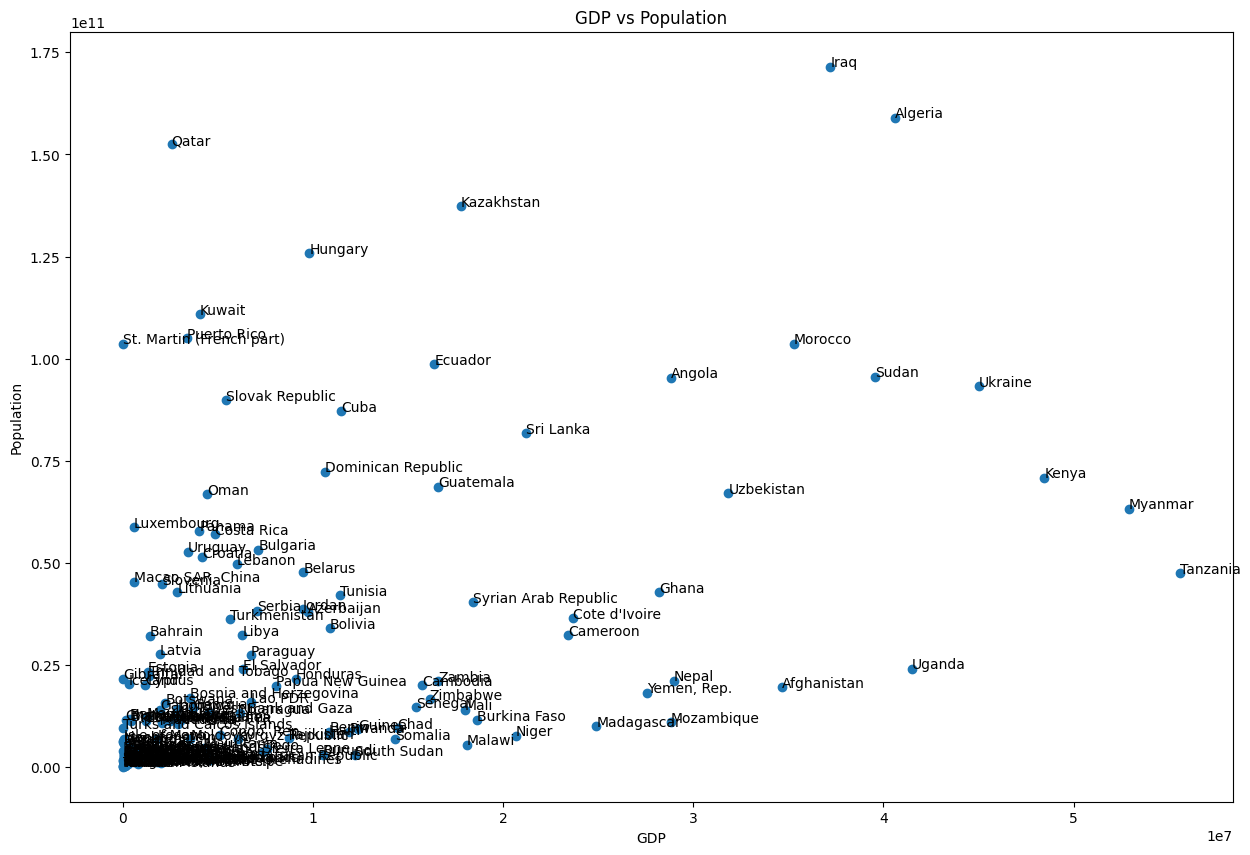

In [92]:
# plot the data
x = list(df_outlier_removed['population'])
y = list(df_outlier_removed['gdp'])
text = df_outlier_removed['Country Name']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)
plt.title('GDP vs Population')
plt.xlabel('GDP')
plt.ylabel('Population')
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))

Now, this plot is more clearly showing all the countries and we can figure out their respective positions as the outliers (US, India and China) are removed. <br>This is how we handle outliers in the transformation stage!

### 3.9 Feature scaling
_I wouldn't wanna confuse you with all the "technical" terms to explain this concept. Lemme try explaining this as easily as I can._

__Feature scaling__ is a technique where we basically bring all the values in a column within a similar range.
Now, why would we want that? Very simple - to do easier comparison and make accurate decisions. This is true for Humans as well as Computers (ML models).

Feature scaling becomes necessary when dealing with datasets containing features that have different ranges, units of measurement, or orders of magnitude. In such cases, the variation in feature values can lead to biased model performance or difficulties during the learning process.

We often calculate the distance between points to gain some insights.

Refer the below image to get a sense of what I mean -

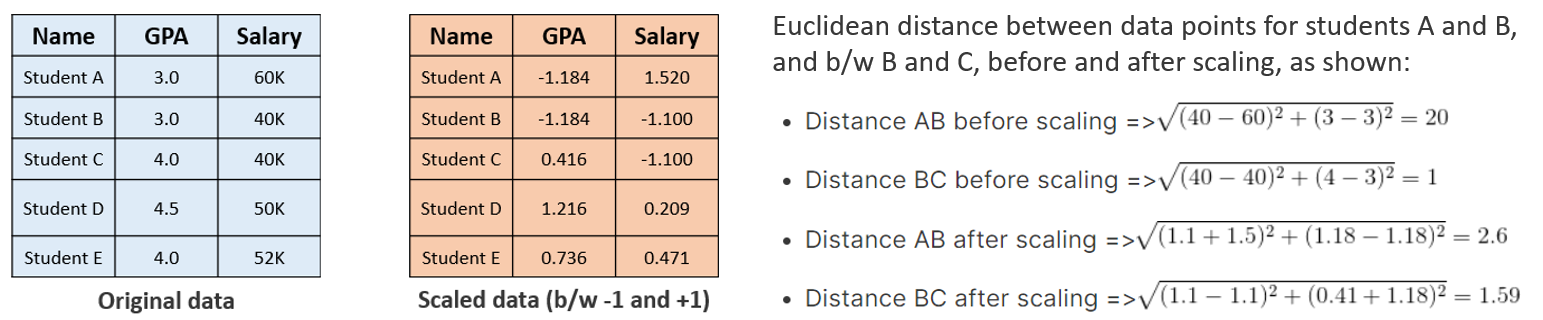


There are many techinques for feature scaling, in this section we will be discussing about two of them - __Normalization & Standardization__.
- __Normalization__ refers to scaling a set of values so that the range is between zero and one.
- __Standardization__ refers to scaling a set of values so that they have a mean of zero and a standard deviation of one.

In [93]:
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
%matplotlib inline 

# read in the projects data set and do basic wrangling 
gdp = pd.read_csv('C:/Users/Admin/Downloads/ETL Project/kaggle/input/gdp_data.csv', skiprows=4)
gdp.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
population = pd.read_csv('C:/Users/Admin/Downloads/ETL Project/kaggle/input/population_data.csv', skiprows=4)
population.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)


# Reshape the data sets so that they are in long format
gdp_melt = gdp.melt(id_vars=['Country Name'], 
                    var_name='year', 
                    value_name='gdp')

# Use back fill and forward fill to fill in missing gdp values
gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby('Country Name')['gdp'].ffill().bfill()

population_melt = population.melt(id_vars=['Country Name'], 
                                  var_name='year', 
                                  value_name='population')

# Use back fill and forward fill to fill in missing population values
population_melt['population'] = population_melt.sort_values('year').groupby('Country Name')['population'].ffill().bfill()

# merge the population and gdp data together into one data frame
df_country = gdp_melt.merge(population_melt, on=('Country Name', 'year'))

# filter data for the year 2016
df_2016 = df_country[df_country['year'] == '2016']

# filter out values that are not countries
non_countries = ['World',
 'High income',
 'OECD members',
 'Post-demographic dividend',
 'IDA & IBRD total',
 'Low & middle income',
 'Middle income',
 'IBRD only',
 'East Asia & Pacific',
 'Europe & Central Asia',
 'North America',
 'Upper middle income',
 'Late-demographic dividend',
 'European Union',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Euro area',
 'Early-demographic dividend',
 'Lower middle income',
 'Latin America & Caribbean',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Latin America & Caribbean (excluding high income)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Middle East & North Africa',
 'Europe & Central Asia (excluding high income)',
 'South Asia (IDA & IBRD)',
 'South Asia',
 'Arab World',
 'IDA total',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (IDA & IBRD countries)',
 'Sub-Saharan Africa (excluding high income)',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Central Europe and the Baltics',
 'Pre-demographic dividend',
 'IDA only',
 'Least developed countries: UN classification',
 'IDA blend',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'Low income',
 'Small states',
 'Other small states',
 'Not classified',
 'Caribbean small states',
 'Pacific island small states']

# remove non countries from the data
df_2016 = df_2016[~df_2016['Country Name'].isin(non_countries)]


# show the first ten rows
print('first ten rows of data')
df_2016.head(10)

first ten rows of data


Country Name  year           gdp  population
14784                 Aruba  2016  2.584464e+09    104822.0
14785           Afghanistan  2016  1.946902e+10  34656032.0
14786                Angola  2016  9.533720e+10  28813463.0
14787               Albania  2016  1.188368e+10   2876101.0
14788               Andorra  2016  2.877312e+09     77281.0
14790  United Arab Emirates  2016  3.570451e+11   9269612.0
14791             Argentina  2016  5.548609e+11  43847430.0
14792               Armenia  2016  1.054614e+10   2924816.0
14793        American Samoa  2016  6.580000e+08     55599.0
14794   Antigua and Barbuda  2016  1.460145e+09    100963.0

#### 3.9.1 Normalization of Data

To normalize data, you take a feature, like gdp, and use the following formula - 
<br>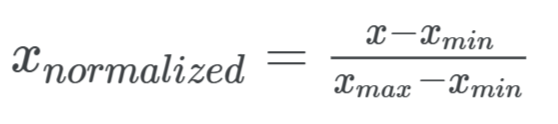

where

- x is a value of gdp
- x_max is the maximum gdp in the data
- x_min is the minimum GDP in the data

Let's now create a class which perform this operation on our chosen columns (gdp and population") of the data "df_2016".

In [94]:
# Define the Normalizer class
class Normalizer():
    
    def __init__(self, dataframe):
        # Initialize an empty list to store the minimum and maximum values for each column
        self.params = []
        
        # Iterate through each column in the dataframe
        for column in dataframe.columns:
            
            # Calculate the minimum and maximum values for the current column using the x_min_max method
            self.params.append(self.x_min_max(dataframe[column]))
            
    def x_min_max(self, data):
        # Calculate the minimum and maximum values for the input data
        minimum = min(data)
        maximum = max(data)
        # Return the minimum and maximum values as a tuple
        return minimum, maximum

    def normalize_data(self, dataframe): 
        # Initialize an empty dictionary to store the normalized data
        normalized_data = {}
        
        # Iterate through each column in the dataframe using the items() method
        for column_name, column_data in dataframe.items():
            
            # Retrieve the minimum and maximum values for the current column from the params list
            column_min, column_max = self.params[dataframe.columns.get_loc(column_name)]
            
            # Normalize the data for the current column and store it in the normalized_data dictionary
            normalized_data[column_name] = (column_data - column_min) / (column_max - column_min)
        
        # Return the normalized data as a DataFrame
        return pd.DataFrame(normalized_data)

In [95]:
df_normalizer = Normalizer(df_2016[['gdp', 'population']]) #Creating the object of the class and passing a dataframe as an input

In [96]:
df_normalizer.normalize_data(df_2016[['gdp', 'population']]) #Using the object to call the normalize_data function and passing a dataframe as an input

gdp  population
14784  0.000137    0.000068
14785  0.001043    0.025130
14786  0.005117    0.020892
14787  0.000636    0.002078
14788  0.000153    0.000048
...         ...         ...
15043  0.000359    0.001309
15044  0.000976    0.020000
15045  0.015878    0.040623
15046  0.001123    0.012026
15047  0.000890    0.011707

[217 rows x 2 columns]

Wow! We just scaled our data within the range of 0 and 1 using __Normalization__.

Another method for scaling our data - where we make sure that mean of the data is 0 and standard deviation is 1 instead of focusing on the values itself. 
<br>This is called __Standardization__. Let's see how this works! 

#### 3.9.2 Standardization of Data

To standardize data, you take a feature, like gdp, and use the following formula - 
<br>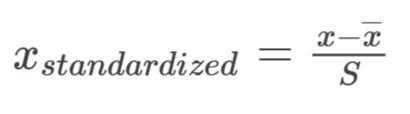

where

- x is a value of gdp
- x̄ is the mean of gdp
- S is the standard deviation of gdp

Let's now create a class which perform this operation on our chosen columns (gdp and population") of the data "df_2016".

In [97]:
class StandardScaler:
    def __init__(self, dataframe):
        # Initialize an empty dictionary to store the mean and standard deviation for each column
        self.params = {}
        
        # Iterate through each column in the dataframe
        for column in dataframe.columns:
            # Calculate the mean and standard deviation for the current column using calc_mean_std method
            self.params[column] = self.calc_mean_std(dataframe[column])

    def calc_mean_std(self, data):
        # Calculate the mean and standard deviation of the input data
        mean = data.mean()
        std = data.std()
        # Return the mean and standard deviation as a tuple
        return mean, std

    def standardize_data(self, dataframe):
        # Initialize an empty dictionary to store the standardized data
        standardized_data = {}
        
        # Iterate through each column in the dataframe using the items() method
        for column_name, column_data in dataframe.items():
            # Retrieve the mean and standard deviation for the current column from the params dictionary
            column_mean, column_std = self.params[column_name]
            
            # Standardize the data for the current column and store it in the standardized_data dictionary
            standardized_data[column_name] = (column_data - column_mean) / column_std
        
        # Return the standardized data as a DataFrame
        return pd.DataFrame(standardized_data)

In [98]:
df_standardiser = StandardScaler(df_2016[['gdp','population']]) #Creating the object of the class and passing a dataframe as an input

In [99]:
df_standardiser.standardize_data(df_2016[['gdp','population']])  #Using the object to call the normalize_data function and passing a dataframe as an input

gdp  population
14784 -0.222257   -0.253512
14785 -0.211421    0.003434
14786 -0.162733   -0.040016
14787 -0.216289   -0.232903
14788 -0.222069   -0.253717
...         ...         ...
15043 -0.219606   -0.240785
15044 -0.212227   -0.049157
15045 -0.034108    0.162276
15046 -0.210468   -0.130907
15047 -0.213250   -0.134187

[217 rows x 2 columns]

And done!
We've successfully scaled our required column's values which will be useful while feeding this data to a Machine learning model.

__NOTE__ - We use standardisation when the column values follow a bell curve and normalisation when the column values do not follow a bell curve.
<br> Also, standardisation is not much effected by outliers but normalisation is effected.

### 3.10 Feature engineering
This is nothing but creating new columns using the existing features. It could be done as per the requirements of the ML model we want to create.

For now let's create a new feature gdppercapita, which is GDP divided by population.

Let's start then!

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# read in the projects data set and do basic wrangling 
gdp = pd.read_csv('C:/Users/Admin/Downloads/ETL Project/kaggle/input/gdp_data.csv', skiprows=4)
gdp.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
population = pd.read_csv('C:/Users/Admin/Downloads/ETL Project/kaggle/input/population_data.csv', skiprows=4)
population.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)


# Reshape the data sets so that they are in long format
gdp_melt = gdp.melt(id_vars=['Country Name'], 
                    var_name='year', 
                    value_name='gdp')

# Use back fill and forward fill to fill in missing gdp values
gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby('Country Name')['gdp'].ffill().bfill()

population_melt = population.melt(id_vars=['Country Name'], 
                                  var_name='year', 
                                  value_name='population')

# Use back fill and forward fill to fill in missing population values
population_melt['population'] = population_melt.sort_values('year').groupby('Country Name')['population'].ffill().bfill()

# merge the population and gdp data together into one data frame
df_country = gdp_melt.merge(population_melt, on=('Country Name', 'year'))

# filter data for the year 2016
df_2016 = df_country[df_country['year'] == '2016']

# filter out values that are not countries
non_countries = ['World',
 'High income',
 'OECD members',
 'Post-demographic dividend',
 'IDA & IBRD total',
 'Low & middle income',
 'Middle income',
 'IBRD only',
 'East Asia & Pacific',
 'Europe & Central Asia',
 'North America',
 'Upper middle income',
 'Late-demographic dividend',
 'European Union',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Euro area',
 'Early-demographic dividend',
 'Lower middle income',
 'Latin America & Caribbean',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Latin America & Caribbean (excluding high income)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Middle East & North Africa',
 'Europe & Central Asia (excluding high income)',
 'South Asia (IDA & IBRD)',
 'South Asia',
 'Arab World',
 'IDA total',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (IDA & IBRD countries)',
 'Sub-Saharan Africa (excluding high income)',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Central Europe and the Baltics',
 'Pre-demographic dividend',
 'IDA only',
 'Least developed countries: UN classification',
 'IDA blend',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'Low income',
 'Small states',
 'Other small states',
 'Not classified',
 'Caribbean small states',
 'Pacific island small states']

# remove non countries from the data
df_2016 = df_2016[~df_2016['Country Name'].isin(non_countries)]
df_2016.reset_index(inplace=True, drop=True)

Create a new feature called gdppercapita in a new column. This feature should be the gdp value divided by the population.

In [101]:
df_2016['gdppercapita'] = df_2016['gdp'] / df_2016['population']

In [102]:
# Let's see if the new feature is created or not

df_2016

Country Name  year           gdp  population  gdppercapita
0           Aruba  2016  2.584464e+09    104822.0  24655.737223
1     Afghanistan  2016  1.946902e+10  34656032.0    561.778746
2          Angola  2016  9.533720e+10  28813463.0   3308.772828
3         Albania  2016  1.188368e+10   2876101.0   4131.872341
4         Andorra  2016  2.877312e+09     77281.0  37231.815671
..            ...   ...           ...         ...           ...
212        Kosovo  2016  6.715487e+09   1816200.0   3697.548026
213   Yemen, Rep.  2016  1.821333e+10  27584213.0    660.280885
214  South Africa  2016  2.957627e+11  56015473.0   5280.017633
215        Zambia  2016  2.095475e+10  16591390.0   1262.989682
216      Zimbabwe  2016  1.661996e+10  16150362.0   1029.076649

[217 rows x 5 columns]

YES! 
We can see that the new feature named "gdppercapita" is created in the dataframe df_2016. 

So, that wraps up our longest step of ETL process that is "Transformation".

### Let's start the next stage then!
## **4. Stage 3 - LOAD**

**Meaning** -  process of storing the cleaned data present in a python dataframe to a destination (which could be a CSV, JSON, or DATABASE) 

We will now begin implementing different methods in it. But before that let's do the data cleaning and have the final data ready in a dataframe.

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# read in the projects data set and do basic wrangling 
gdp = pd.read_csv('C:/Users/Admin/Downloads/ETL Project/kaggle/input/gdp_data.csv', skiprows=4)
gdp.drop(['Unnamed: 62', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
population = pd.read_csv('C:/Users/Admin/Downloads/ETL Project/kaggle/input/population_data.csv', skiprows=4)
population.drop(['Unnamed: 62', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)


# Reshape the data sets so that they are in long format
gdp_melt = gdp.melt(id_vars=['Country Name', 'Country Code'], 
                    var_name='year', 
                    value_name='gdp')

# Use back fill and forward fill to fill in missing gdp values
gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby(['Country Name', 'Country Code'])['gdp'].ffill().bfill()

population_melt = population.melt(id_vars=['Country Name', 'Country Code'], 
                                  var_name='year', 
                                  value_name='population')

# Use back fill and forward fill to fill in missing population values
population_melt['population'] = population_melt.sort_values('year').groupby('Country Name')['population'].ffill().bfill()

# merge the population and gdp data together into one data frame
df_indicator = gdp_melt.merge(population_melt, on=('Country Name', 'Country Code', 'year'))

# filter out values that are not countries
non_countries = ['World',
 'High income',
 'OECD members',
 'Post-demographic dividend',
 'IDA & IBRD total',
 'Low & middle income',
 'Middle income',
 'IBRD only',
 'East Asia & Pacific',
 'Europe & Central Asia',
 'North America',
 'Upper middle income',
 'Late-demographic dividend',
 'European Union',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Euro area',
 'Early-demographic dividend',
 'Lower middle income',
 'Latin America & Caribbean',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Latin America & Caribbean (excluding high income)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Middle East & North Africa',
 'Europe & Central Asia (excluding high income)',
 'South Asia (IDA & IBRD)',
 'South Asia',
 'Arab World',
 'IDA total',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (IDA & IBRD countries)',
 'Sub-Saharan Africa (excluding high income)',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Central Europe and the Baltics',
 'Pre-demographic dividend',
 'IDA only',
 'Least developed countries: UN classification',
 'IDA blend',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'Low income',
 'Small states',
 'Other small states',
 'Not classified',
 'Caribbean small states',
 'Pacific island small states']

# remove non countries from the data
df_indicator  = df_indicator[~df_indicator['Country Name'].isin(non_countries)]
df_indicator.reset_index(inplace=True, drop=True)

df_indicator.columns = ['countryname', 'countrycode', 'year', 'gdp', 'population']

# output the first few rows of the data frame
df_indicator.head()

countryname countrycode  year           gdp  population
0        Aruba         ABW  1960  1.916242e+09     54211.0
1  Afghanistan         AFG  1960  5.377778e+08   8996351.0
2       Angola         AGO  1960  1.857319e+10   5643182.0
3      Albania         ALB  1960  1.857319e+10   1608800.0
4      Andorra         AND  1960  1.857319e+10     13411.0

Now, let's read in the countries data set. We will create a data frame called df_projects containing the World Bank projects data. The data frame only has the 'id', 'countryname', 'countrycode', 'totalamt', and 'year' columns.

In [104]:
#!pip install pycountry
#from pycountry import countries

# read in the projects data set with all columns type string
df_projects = pd.read_csv('C:/Users/Admin/Downloads/ETL Project/kaggle/input/projects_data.csv', dtype=str)
df_projects.drop(['Unnamed: 56'], axis=1, inplace=True)

df_projects['countryname'] = df_projects['countryname'].str.split(';').str.get(0)

# set up the libraries and variables
from collections import defaultdict
country_not_found = [] # stores countries not found in the pycountry library
project_country_abbrev_dict = defaultdict(str) # set up an empty dictionary of string values

# iterate through the country names in df_projects. 
# Create a dictionary mapping the country name to the alpha_3 ISO code
for country in df_projects['countryname'].drop_duplicates().sort_values():
    try: 
        # look up the country name in the pycountry library
        # store the country name as the dictionary key and the ISO-3 code as the value
        project_country_abbrev_dict[country] = countries.lookup(country).alpha_3
    except:
        # If the country name is not in the pycountry library, then print out the country name
        # And store the results in the country_not_found list
        country_not_found.append(country)
        
# run this code cell to load the dictionary

country_not_found_mapping = {'Co-operative Republic of Guyana': 'GUY',
             'Commonwealth of Australia':'AUS',
             'Democratic Republic of Sao Tome and Prin':'STP',
             'Democratic Republic of the Congo':'COD',
             'Democratic Socialist Republic of Sri Lan':'LKA',
             'East Asia and Pacific':'EAS',
             'Europe and Central Asia': 'ECS',
             'Islamic  Republic of Afghanistan':'AFG',
             'Latin America':'LCN',
              'Caribbean':'LCN',
             'Macedonia':'MKD',
             'Middle East and North Africa':'MEA',
             'Oriental Republic of Uruguay':'URY',
             'Republic of Congo':'COG',
             "Republic of Cote d'Ivoire":'CIV',
             'Republic of Korea':'KOR',
             'Republic of Niger':'NER',
             'Republic of Kosovo':'XKX',
             'Republic of Rwanda':'RWA',
              'Republic of The Gambia':'GMB',
              'Republic of Togo':'TGO',
              'Republic of the Union of Myanmar':'MMR',
              'Republica Bolivariana de Venezuela':'VEN',
              'Sint Maarten':'SXM',
              "Socialist People's Libyan Arab Jamahiriy":'LBY',
              'Socialist Republic of Vietnam':'VNM',
              'Somali Democratic Republic':'SOM',
              'South Asia':'SAS',
              'St. Kitts and Nevis':'KNA',
              'St. Lucia':'LCA',
              'St. Vincent and the Grenadines':'VCT',
              'State of Eritrea':'ERI',
              'The Independent State of Papua New Guine':'PNG',
              'West Bank and Gaza':'PSE',
              'World':'WLD'}

project_country_abbrev_dict.update(country_not_found_mapping)

df_projects['countrycode'] = df_projects['countryname'].apply(lambda x: project_country_abbrev_dict[x])

df_projects['boardapprovaldate'] = pd.to_datetime(df_projects['boardapprovaldate'])

df_projects['year'] = df_projects['boardapprovaldate'].dt.year.astype(str).str.slice(stop=4)

df_projects['totalamt'] = pd.to_numeric(df_projects['totalamt'].str.replace(',',""))

df_projects = df_projects[['id', 'countryname', 'countrycode', 'totalamt', 'year']]

df_projects.head()

id                       countryname countrycode   totalamt  year
0  P162228                             World         WLD          0  2018
1  P163962  Democratic Republic of the Congo         COD  200000000  2018
2  P167672   People's Republic of Bangladesh         BGD   58330000  2018
3  P158768  Islamic  Republic of Afghanistan         AFG   20000000  2018
4  P161364       Federal Republic of Nigeria         NGA  100000000  2018

The first few rows can be seen in the dataframe - loaded and cleaned. We now have two data frames:
- df_projects, which contain data from the projects data set
- df_indicator, which contain population and gdp data for various years

They both have country code variables. Note, however, that there could be countries represented in the projects data set that are not in the indicator data set and vice versus.

First, let's merge the two data sets together using country code and year as common keys. When joining the data sets, we'll keep all of the data in the df_projects dataframe even if there is no indicator data for that country code.

In [105]:
df_merged = df_projects.merge(df_indicator, how='left', on=['countrycode', 'year'])
df_merged

id                     countryname_x countrycode   totalamt  year  \
0      P162228                             World         WLD          0  2018   
1      P163962  Democratic Republic of the Congo         COD  200000000  2018   
2      P167672   People's Republic of Bangladesh         BGD   58330000  2018   
3      P158768  Islamic  Republic of Afghanistan         AFG   20000000  2018   
4      P161364       Federal Republic of Nigeria         NGA  100000000  2018   
...        ...                               ...         ...        ...   ...   
18243  P006578                 Republic of Chile         CHL   13500000  1948   
18244  P037451         Grand Duchy of Luxembourg         LUX   12000000  1947   
18245  P037362                Kingdom of Denmark         DNK   40000000  1947   
18246  P037452        Kingdom of the Netherlands         NLD  195000000  1947   
18247  P037383                   French Republic         FRA  250000000  1947   

      countryname_y  gdp  population  
0               NaN  NaN         NaN  
1               NaN  NaN         NaN  
2               NaN  NaN         NaN  
3               NaN  NaN         NaN  
4               NaN  NaN         NaN  
...             ...  ...         ...  
18243           NaN  NaN         NaN  
18244           NaN  NaN         NaN  
18245           NaN  NaN         NaN  
18246           NaN  NaN         NaN  
18247           NaN  NaN         NaN  

[18248 rows x 8 columns]

### 4.1 Loading the data in a CSV file
We can store the data present in a dataframe into a CSV file directly - we use the __to_csv()__ method for it!

In [106]:
df_merged.to_csv('countrydata_csv.csv', index=False)

Once we run this code, check the folder where you have this notebook - it will have a new CSV file named "countrydata_csv".

### 4.2 Loading the data in a JSON file
We can store the data present in a dataframe into a JSON file directly - we use the __to_json()__ method for it!

In [107]:
df_merged.to_json('countrydata_json.json', orient='records')

Once we run this code, check the folder where you have this notebook - it will have a new JSON file named "countrydata_json".

### 4.3 Loading the data in a SQLite DB
We can store the data present in a dataframe into a SQLite database directly - we use the __sqlite3__ library for it!

Let's output the df_merged dataframe as a sqlite database file. For this we can put all of the data as one table.

In [108]:
import sqlite3

# connect to the database
# the database file will be worldbank.db
# note that sqlite3 will create this database file if it does not exist already
conn = sqlite3.connect('worldbank.db')

df_merged.to_sql('merged', con = conn, if_exists='replace', index=False)

18248

Once we run this code, check the folder where you have this notebook - it will have a new DB file named "worldbank".

In [109]:
pd.read_sql('SELECT * FROM merged WHERE year = "2017" AND countrycode = "BRA"', con = conn).head()

id                  countryname_x countrycode   totalamt  year  \
0  P162033  Federative Republic of Brazil         BRA  125000000  2017   
1  P158000  Federative Republic of Brazil         BRA          0  2017   
2  P163868  Federative Republic of Brazil         BRA  250000000  2017   
3  P152285  Federative Republic of Brazil         BRA          0  2017   
4  P147158  Federative Republic of Brazil         BRA   50000000  2017   

  countryname_y           gdp   population  
0        Brazil  2.055506e+12  209288278.0  
1        Brazil  2.055506e+12  209288278.0  
2        Brazil  2.055506e+12  209288278.0  
3        Brazil  2.055506e+12  209288278.0  
4        Brazil  2.055506e+12  209288278.0

Next, we'll create a database with multiple tables.

Let's put the df_indicator data in one table and the df_projects data in another table. 
<br>Call the df_indicator table 'indicator' and the df_projects table 'projects'.

In [110]:
import sqlite3

# connect to the database
# the database file will be worldbank.db
# note that sqlite3 will create this database file if it does not exist already
conn = sqlite3.connect('worldbank.db')

df_indicator.to_sql('indicator', con = conn, if_exists='replace', index=False)
df_projects.to_sql('projects', con = conn, if_exists='replace', index=False)

18248

In [111]:
pd.read_sql('SELECT * FROM projects LEFT JOIN indicator ON \
projects.countrycode = indicator.countrycode AND \
projects.year = indicator.year WHERE \
projects.year = "2017" AND projects.countrycode = "BRA"', con = conn).head()

id                    countryname countrycode   totalamt  year  \
0  P162033  Federative Republic of Brazil         BRA  125000000  2017   
1  P158000  Federative Republic of Brazil         BRA          0  2017   
2  P163868  Federative Republic of Brazil         BRA  250000000  2017   
3  P152285  Federative Republic of Brazil         BRA          0  2017   
4  P147158  Federative Republic of Brazil         BRA   50000000  2017   

  countryname countrycode  year           gdp   population  
0      Brazil         BRA  2017  2.055506e+12  209288278.0  
1      Brazil         BRA  2017  2.055506e+12  209288278.0  
2      Brazil         BRA  2017  2.055506e+12  209288278.0  
3      Brazil         BRA  2017  2.055506e+12  209288278.0  
4      Brazil         BRA  2017  2.055506e+12  209288278.0

In [112]:
# commit any changes to the database and close the database
conn.commit()
conn.close()

### 4.4 Loading the data in a PostgreSQL DB
We can store the data present in a dataframe into a PostgreSQL database directly - we use the __pyscopg2__ library for it!

Let's first store some data in a dataframe (which has the same structure as our table in PostgreSQL).
Here is our current table in PostgreSQL DB - 
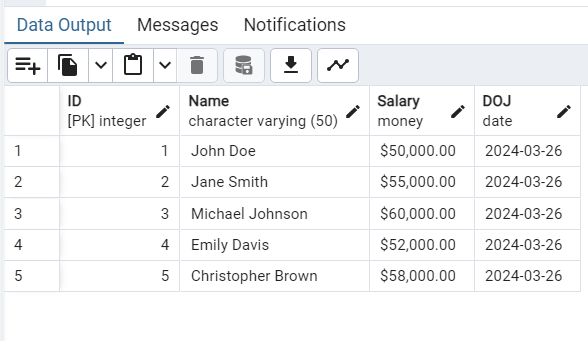
<br>Here is the data which we wanna add to the existing table in PostgreSQL DB - 
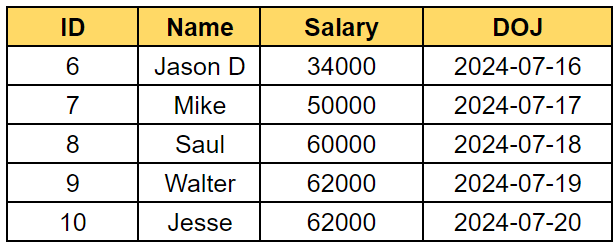

In [113]:
#First, let's import the data in a dataframe from a CSV file
# import pandas as pd

df = pd.read_csv('C:/Users/Admin/Downloads/ETL Project/DF to DB.csv')
df.head()

ID     Name  Salary         DOJ
0   6  Jason D   34000  2024-07-16
1   7     Mike   50000  2024-07-17
2   8     Saul   60000  2024-07-18
3   9   Walter   62000  2024-07-19
4  10    Jesse   62000  2024-07-20

In [114]:
# Establishing the connection
conn = psycopg2.connect(
   database="Newdb", user='postgres', password='Ankit@1998', host='localhost', port='5432'
)

# Setting auto commit to False
conn.autocommit = True

# Creating a cursor object using the cursor() method
cursor = conn.cursor()

# Preparing a list of tuples containing the data to be inserted
data = []
for i, row in df.iterrows():
    data.append(tuple(row))

# Preparing SQL query to INSERT records into the database
insert_query = '''INSERT INTO public."Employee"("ID", "Name", "Salary", "DOJ") VALUES (%s, %s, %s, %s)'''

# Executing the INSERT query for multiple rows
cursor.executemany(insert_query, data)

# Committing your changes in the database
conn.commit()
print("Records inserted successfully.")

# Closing the connection
conn.close()

Records inserted successfully.


Here is the final table in the PostgreSQL DB - 
<br>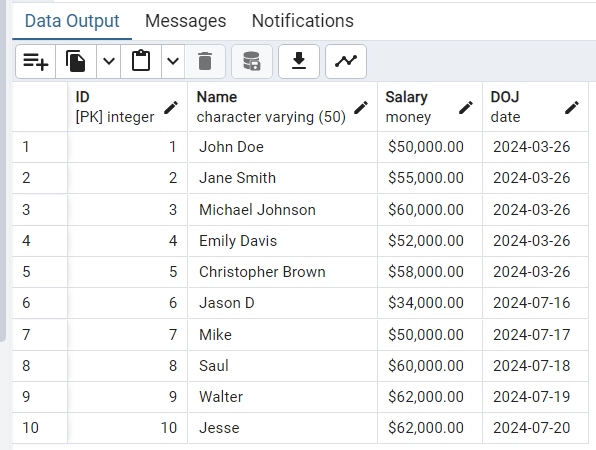

And finally we're done with all of the stages of an ETL process!

This project shows all the steps required to create an ETL pipeline and if you have understood them clearly, then I promise you that you will be able to create any kind of Data pipeline as per the requirements.

Haaasssshhhh! That was quite a long process - but it was mainly because a lot of documentation and variation in every stage. In order to cover everything related to the ETL process I had to make sure to provide a lot of context to you for clear understanding.

#### Won't bug you anymore! Go build a new pipeline on your own using what you have learnt here :)